In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

df = pd.read_excel('/content/drive/MyDrive/crime_rate.xlsx')
df

Year  Regn  Aslt  Fraud  Drug  Thief    Popln    Incme  StnNo  Police  \
0    2023  경기고양  2178   5695   223   2786  1087607  2530948     18   590.0   
1    2023  경기과천    90    259    11    271    81219  3140116      2   179.0   
2    2023  경기광명   674   1679    42    968   283124  2765984      6   497.0   
3    2023  경기광주  1071   1988    53   1012   404270  2754320      9   475.0   
4    2023  경기구리   400    886    35    538   188634  2379973      5   376.0   
..    ...   ...   ...    ...   ...    ...      ...      ...    ...     ...   
599  2018  경남사천   253    524    25    206   113888  2370039      8   229.0   
600  2018  경남양산   628   1841    30    984   348639  2292033     12   416.0   
601  2018  경남진주   820   1710    80   1723   345987  2207642     13   521.0   
602  2018  경남창원  2882   5522   126   3377  1053601  2395638     33   768.0   
603  2018  경남통영   376    930    17    412   133720  1803966      8   247.0   

     ...    CPI  Aging         Dens   Estab   Multi  Crime_Aslt  Crime_Fraud  \
0    ...  129.2  147.1  4055.964945    76.0  6717.0  200.256159   523.626641   
1    ...  129.2   96.6  2264.259827     0.0   258.0  110.811510   318.890900   
2    ...  129.2  144.4  7350.051921   145.0  1885.0  238.058236   593.026377   
3    ...  129.2  132.7   938.003202    35.0  3736.0  264.921958   491.750563   
4    ...  129.2  154.1  5657.888422   184.0  1013.0  212.050850   469.692632   
..   ...    ...    ...          ...     ...     ...         ...          ...   
599  ...  114.7  151.0   285.562409   173.0   700.0  222.148075   460.101152   
600  ...  114.7   76.8   717.807288   327.0  2036.0  180.129016   528.053373   
601  ...  114.7  112.4   485.316520   276.0  1754.0  237.003124   494.238223   
602  ...  114.7   93.0  1406.226309  2003.0  5202.0  273.538085   524.107323   
603  ...  114.7  121.4   557.375683   333.0   932.0  281.184565   695.483099   

     Crime_Drug  Crime_Thief        Crime  
0     20.503730   256.158704  1000.545234  
1     13.543629   333.665768   776.911806  
2     14.834489   341.899662  1187.818765  
3     13.110050   250.327751  1020.110322  
4     18.554449   285.208393   985.506324  
..          ...          ...          ...  
599   21.951391   180.879461   885.080079  
600    8.604889   282.240369   999.027648  
601   23.122256   497.995589  1252.359193  
602   11.958986   320.519817  1130.124212  
603   12.713132   308.106491  1297.487287  

[604 rows x 22 columns]

In [ ]:
df = df.sort_values(by=['Regn'])

# 전처리
# 인구수와 범죄횟수, 지역명, 날짜 칼럼 삭제
df = df.drop(columns=['Popln', 'Aslt', 'Fraud', 'Drug', 'Thief', 'Regn', 'Year', 'Crime', 'CPI'])
df.head()

# 최종칼럼:
# Incme	    StnNo	     Police	   Float	  Unemp	  CPI	         Aging	    Dens	  Estab	        Multi	        Crime
# 평균소득   지역내파출소  경찰관수   유동인구   실업율   소비자물가지수  노령화인구  인구밀도   유흥주점수     다문화가구수     범죄율

Incme  StnNo  Police  Float  Unemp  Aging        Dens  Estab   Multi  \
386  2124210      7   412.0  231.0    1.9  216.3  204.610743  216.0  1086.0   
338  2268741      7   414.0  233.0    2.0  236.7  203.088881  214.0  1100.0   
216  2350665      7   418.0  235.0    1.6  258.8  201.223062  213.0  1187.0   
433  2018895      7   412.0  222.0    3.3  200.5  204.952778  216.0  1017.0   
481  1957219      7   411.0  227.0    2.4  186.5  205.069031  221.0   914.0   

     Crime_Aslt  Crime_Fraud  Crime_Drug  Crime_Thief  
386  216.937055   395.370131    7.982532   343.718451  
338  228.024278   498.625704    4.730794   298.986191  
216  244.462588   680.866505   17.188776   359.531892  
433  314.549435   498.778836    8.906765   300.017345  
481  314.371117   484.440738   12.181295   340.139242

In [ ]:
# 결측치 확인
print(df.isnull().sum())

# 결측치를 근처 값으로 대체
df = df.fillna(method='ffill')

# print
df.head()

Incme          0
StnNo          0
Police         0
Float          0
Unemp          0
Aging          0
Dens           0
Estab          0
Multi          0
Crime_Aslt     0
Crime_Fraud    0
Crime_Drug     0
Crime_Thief    0
dtype: int64


<ipython-input-6-15882d364e38>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Incme  StnNo  Police  Float  Unemp  Aging        Dens  Estab   Multi  \
386  2124210      7   412.0  231.0    1.9  216.3  204.610743  216.0  1086.0   
338  2268741      7   414.0  233.0    2.0  236.7  203.088881  214.0  1100.0   
216  2350665      7   418.0  235.0    1.6  258.8  201.223062  213.0  1187.0   
433  2018895      7   412.0  222.0    3.3  200.5  204.952778  216.0  1017.0   
481  1957219      7   411.0  227.0    2.4  186.5  205.069031  221.0   914.0   

     Crime_Aslt  Crime_Fraud  Crime_Drug  Crime_Thief  
386  216.937055   395.370131    7.982532   343.718451  
338  228.024278   498.625704    4.730794   298.986191  
216  244.462588   680.866505   17.188776   359.531892  
433  314.549435   498.778836    8.906765   300.017345  
481  314.371117   484.440738   12.181295   340.139242

In [ ]:
# 각 범죄율 내에서 다른 범죄율 칼럼은 제외
df_Crime_Aslt = df.drop(columns=['Crime_Fraud', 'Crime_Drug', 'Crime_Thief'])
df_Crime_Fraud = df.drop(columns=['Crime_Aslt', 'Crime_Drug', 'Crime_Thief'])
df_Crime_Drug = df.drop(columns=['Crime_Aslt', 'Crime_Fraud', 'Crime_Thief'])
df_Crime_Thief = df.drop(columns=['Crime_Aslt', 'Crime_Fraud', 'Crime_Drug'])

# Crime_Aslt, Crime_Fraud, Crime_Drug, Crime_Thief
# 각 범죄율과 다른 칼럼간의 상관계수 확인
print(df_Crime_Aslt.corr()['Crime_Aslt'].sort_values(ascending=False))
print(df_Crime_Fraud.corr()['Crime_Fraud'].sort_values(ascending=False))
print(df_Crime_Drug.corr()['Crime_Drug'].sort_values(ascending=False))
print(df_Crime_Thief.corr()['Crime_Thief'].sort_values(ascending=False))

Crime_Aslt    1.000000
Police        0.295303
Unemp         0.291845
Dens          0.264959
Multi         0.214169
Estab         0.176639
Float         0.155166
StnNo         0.096560
Incme        -0.007624
Aging        -0.251791
Name: Crime_Aslt, dtype: float64
Crime_Fraud    1.000000
Incme          0.287373
Police         0.254632
Unemp          0.228017
Dens           0.214389
Estab          0.209338
Multi          0.157240
StnNo          0.154630
Float          0.126952
Aging         -0.086218
Name: Crime_Fraud, dtype: float64
Crime_Drug    1.000000
Aging         0.377436
Incme         0.234298
Dens          0.145333
Estab        -0.063380
Police       -0.077799
Multi        -0.109209
Unemp        -0.114717
StnNo        -0.137890
Float        -0.166852
Name: Crime_Drug, dtype: float64
Crime_Thief    1.000000
Dens           0.293832
Police         0.273906
Incme          0.226430
Unemp          0.216017
Estab          0.190408
Multi          0.156051
StnNo          0.132824
Float   

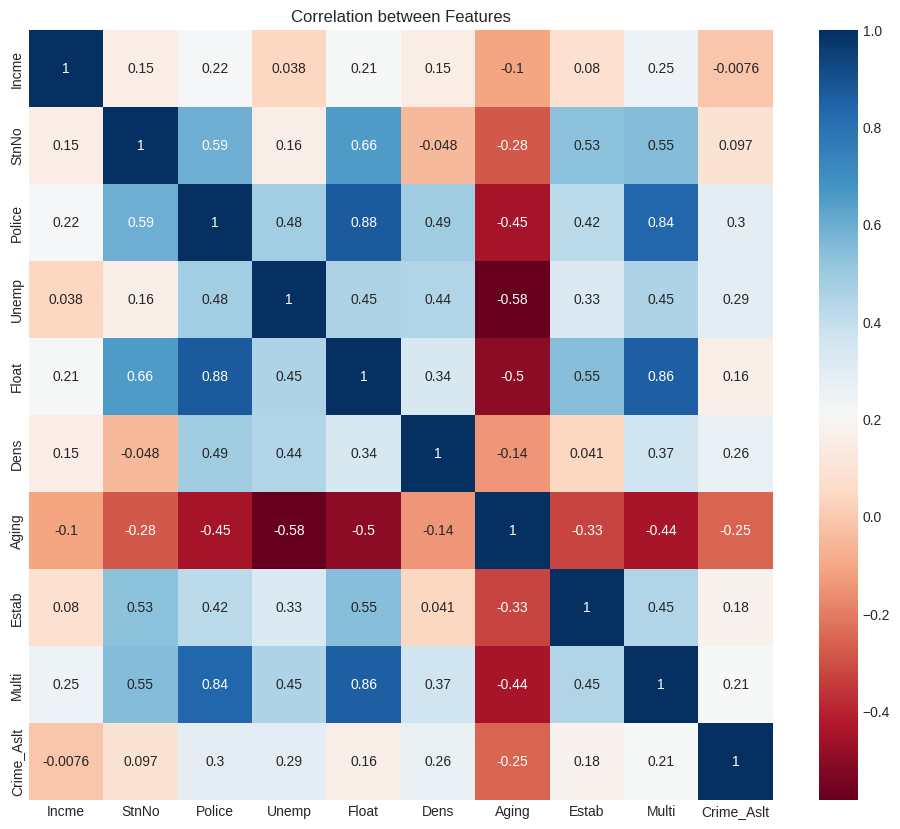

In [ ]:
# 범죄율 중 폭행 범죄율에 대한 heatmap
Aslt_heatmap = df_Crime_Aslt[['Incme', 'StnNo', 'Police','Unemp', 'Float', 'Dens', 'Aging', 'Estab', 'Multi', 'Crime_Aslt']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(Aslt_heatmap, annot=True, cmap='RdBu')
plt.title('Correlation between Features')
plt.show()

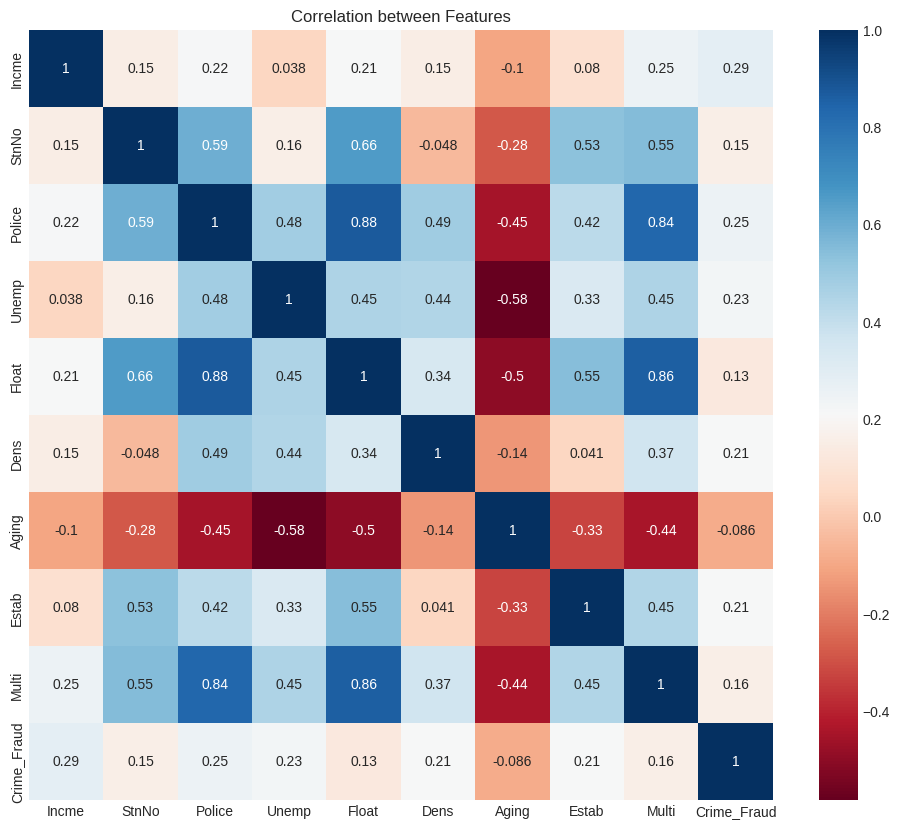

In [ ]:
# 범죄율 중 사기 범죄율에 대한 heatmap
Fraud_heatmap = df_Crime_Fraud[['Incme', 'StnNo', 'Police','Unemp', 'Float', 'Dens', 'Aging', 'Estab', 'Multi', 'Crime_Fraud']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(Fraud_heatmap, annot=True, cmap='RdBu')
plt.title('Correlation between Features')
plt.show()

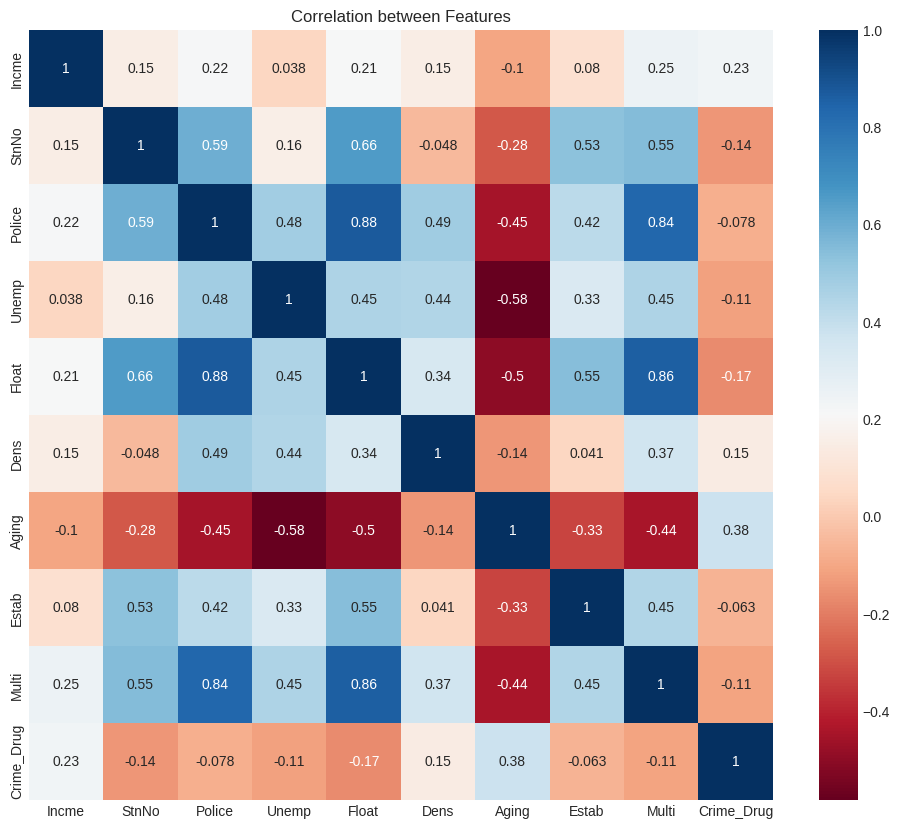

In [ ]:
# 범죄율 중 마약 범죄율에 대한 heatmap
Drug_heatmap = df_Crime_Drug[['Incme', 'StnNo', 'Police','Unemp', 'Float', 'Dens', 'Aging', 'Estab', 'Multi', 'Crime_Drug']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(Drug_heatmap, annot=True, cmap='RdBu')
plt.title('Correlation between Features')
plt.show()

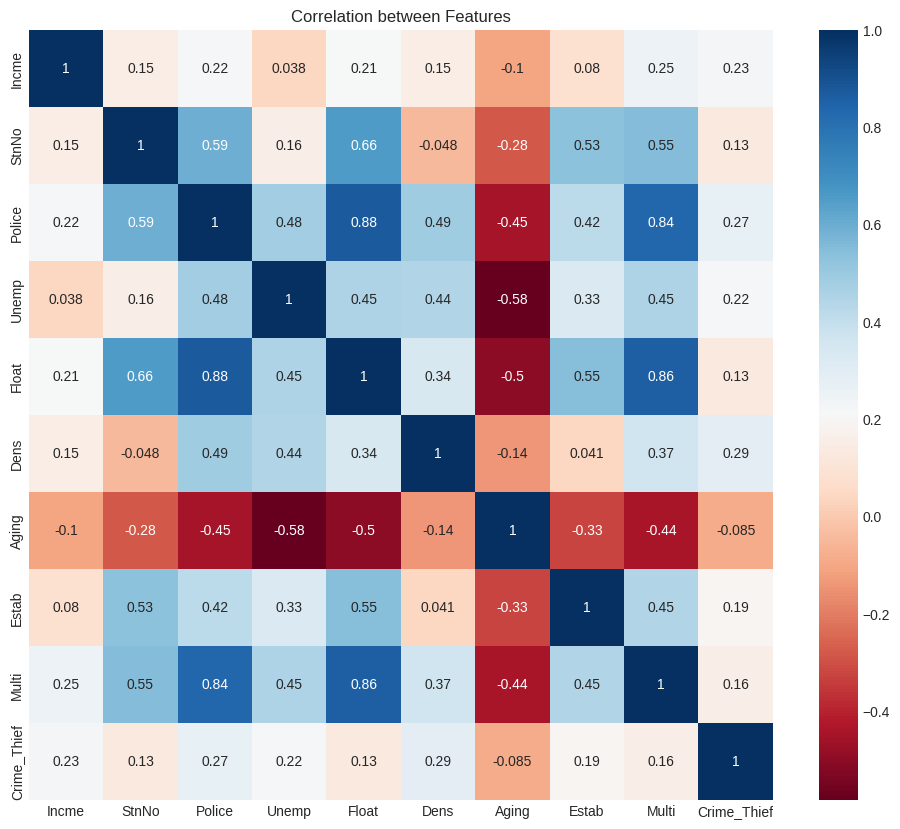

In [ ]:
# 범죄율 중 절도 범죄율에 대한 heatmap
Thief_heatmap = df_Crime_Thief[['Incme', 'StnNo', 'Police','Unemp', 'Float', 'Dens', 'Aging', 'Estab', 'Multi', 'Crime_Thief']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(Thief_heatmap, annot=True, cmap='RdBu')
plt.title('Correlation between Features')
plt.show()

##1. 인구밀도와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계(Log Scale 적용) ##

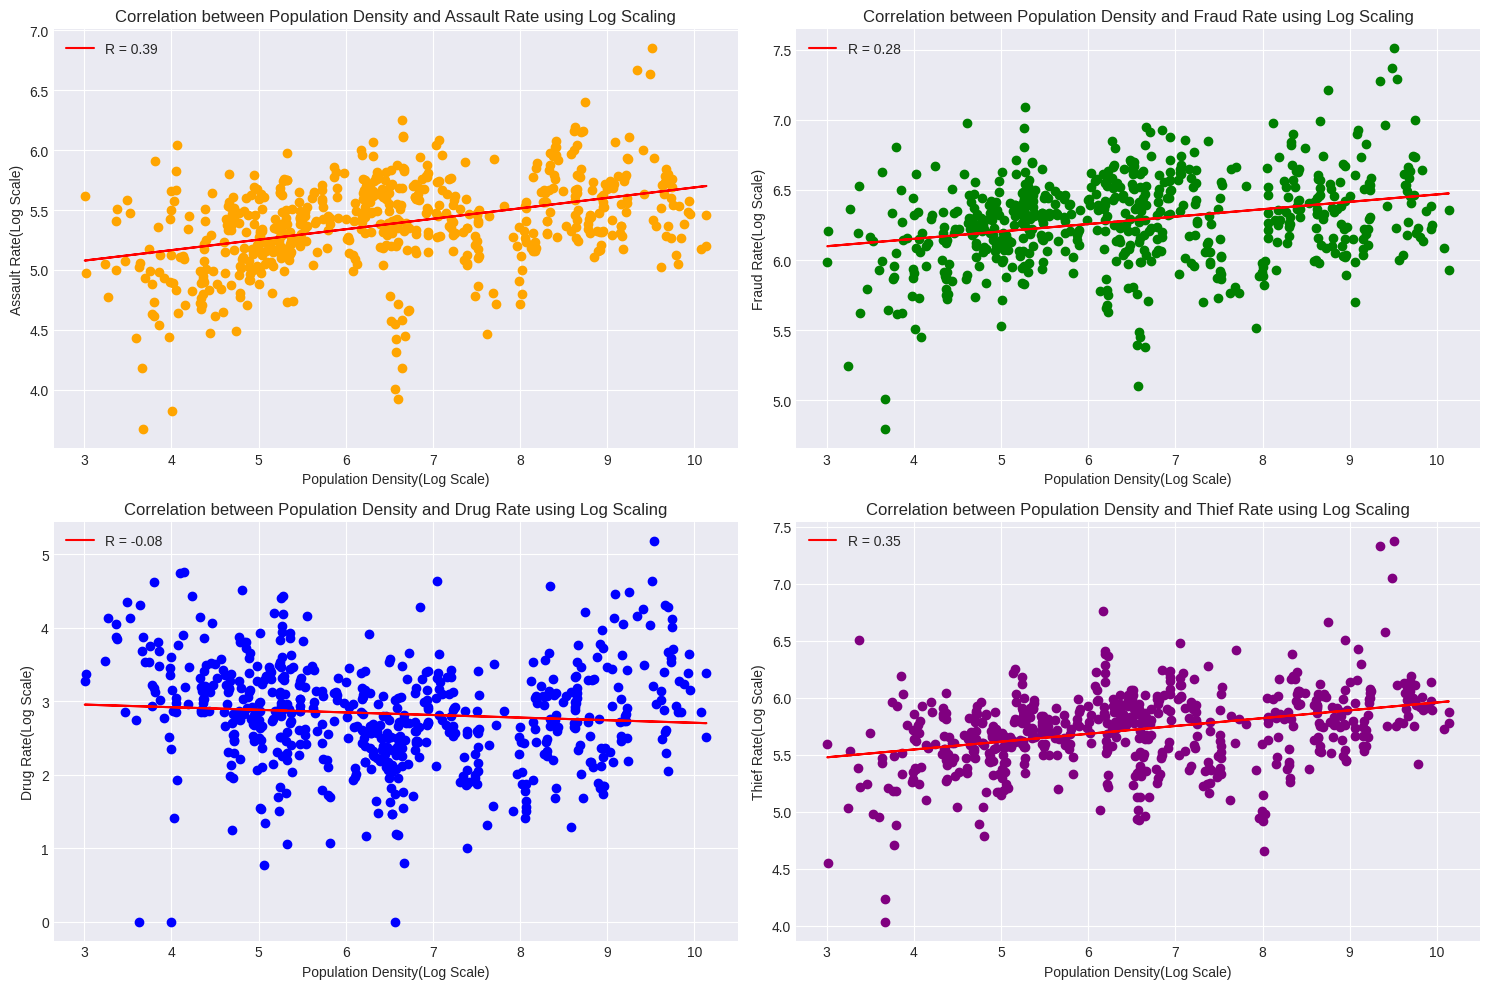

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.style.use('seaborn-v0_8-darkgrid')

x = np.log1p(df_Crime_Aslt['Dens'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Population Density(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Population Density and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Dens'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Population Density(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Population Density and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Drug['Dens'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Population Density(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Population Density and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Dens'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Population Density(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Population Density and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

##2. 월 평균 수입과 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계(Log Scale 적용) ##

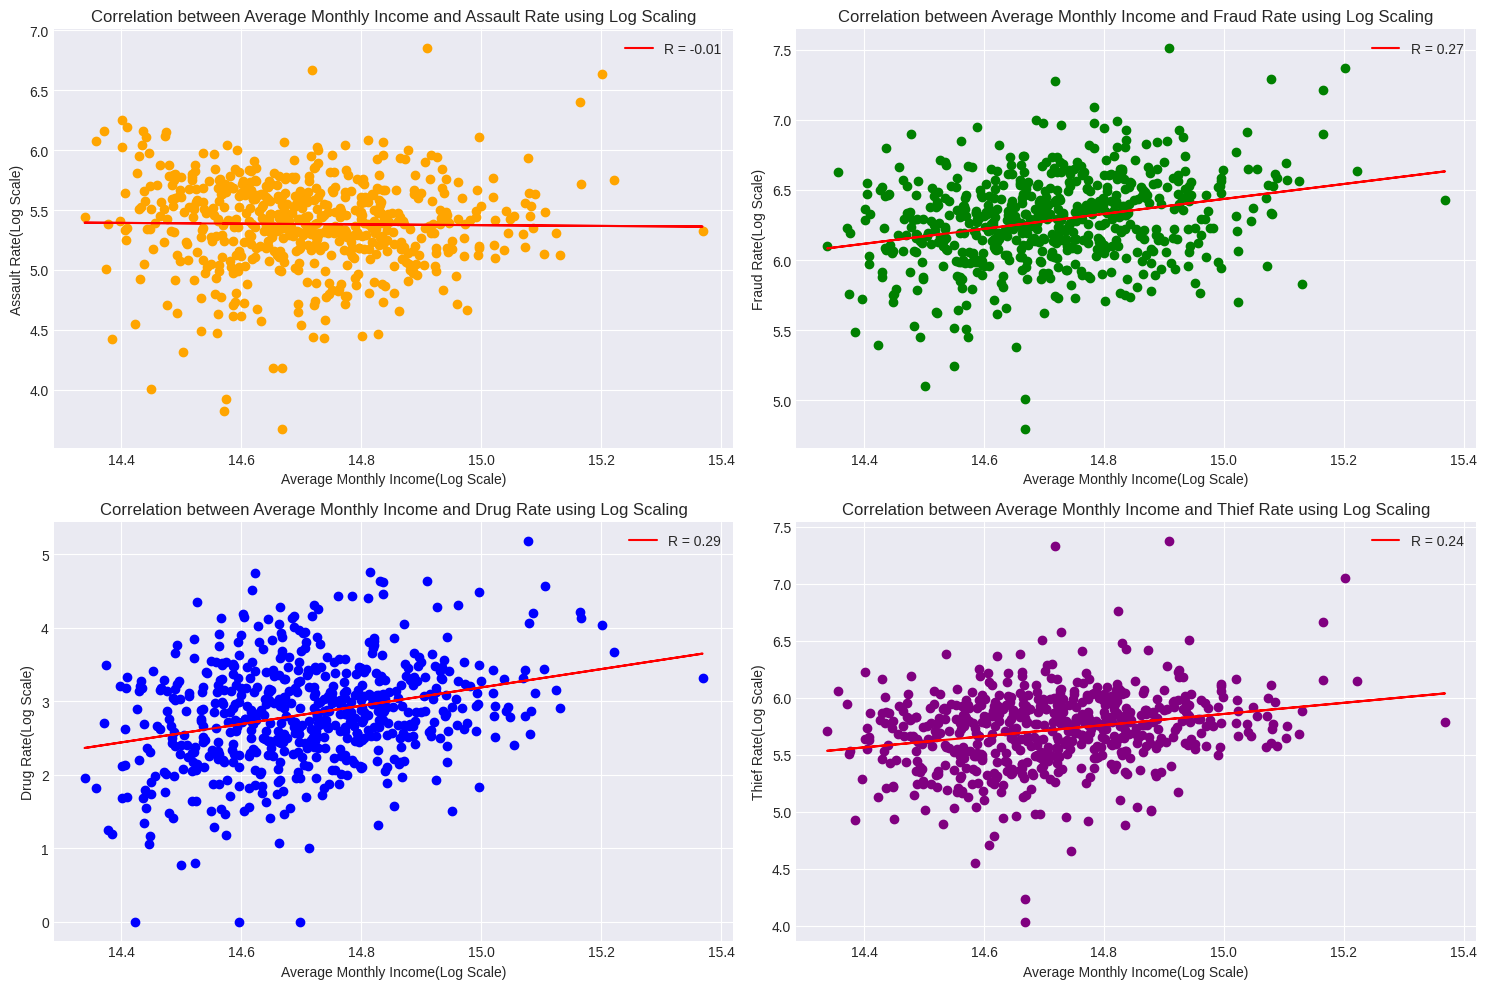

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = np.log1p(df_Crime_Aslt['Incme'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Average Monthly Income(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Average Monthly Income and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Incme'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Average Monthly Income(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Average Monthly Income and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Drug['Incme'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Average Monthly Income(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Average Monthly Income and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Incme'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Average Monthly Income(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Average Monthly Income and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

##3. 경찰관 수와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 ##

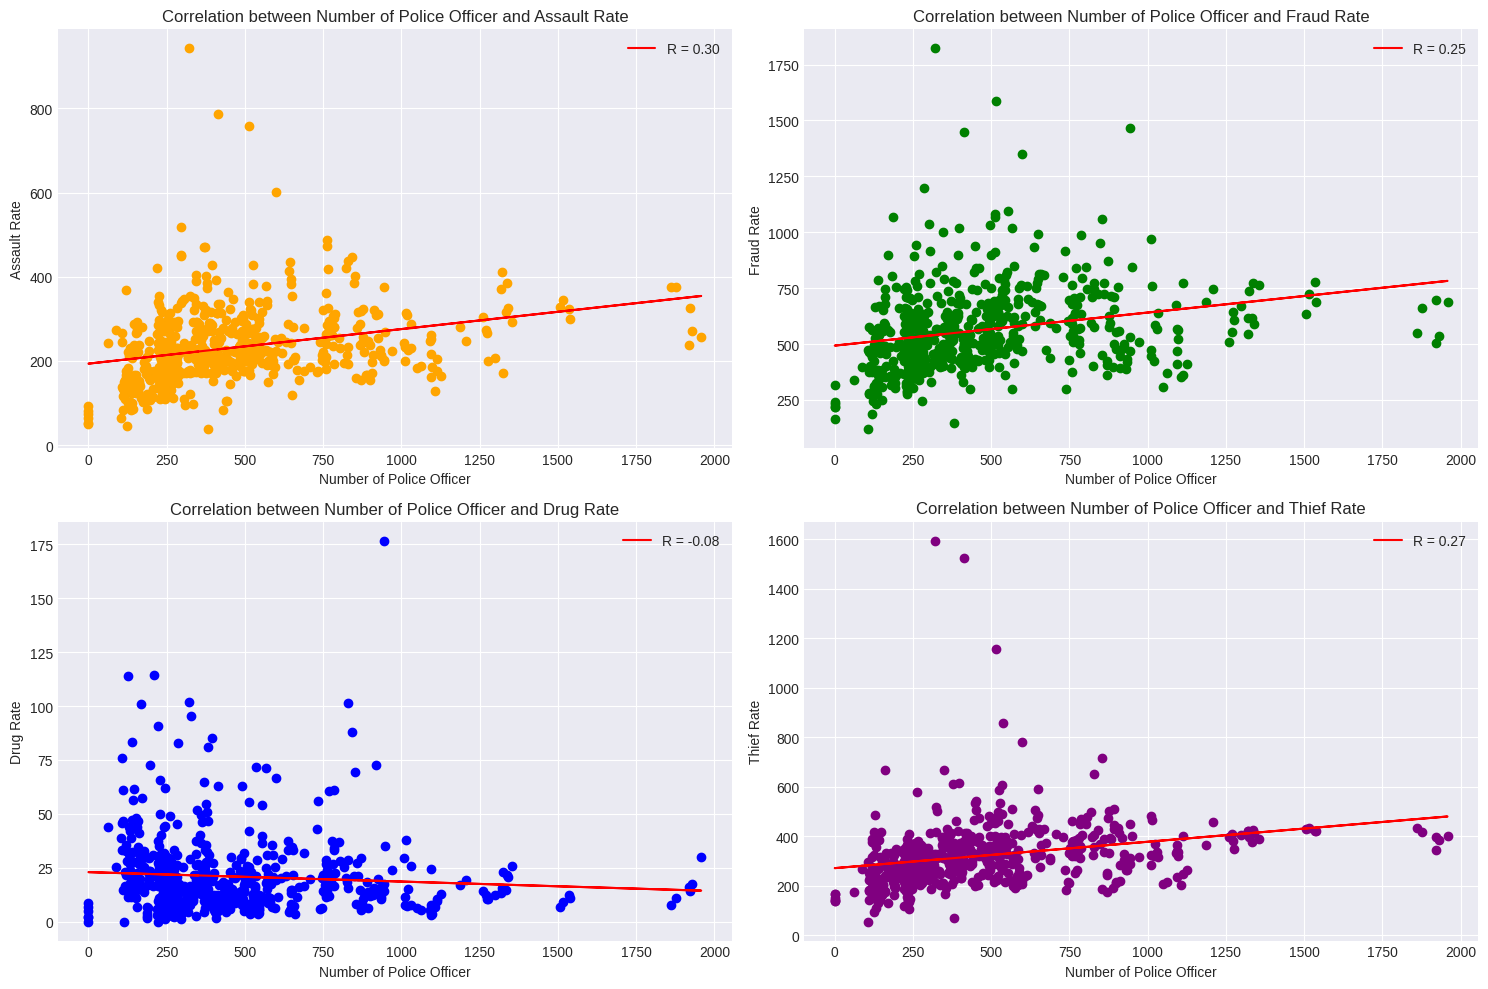

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = df_Crime_Aslt['Police']
y = df_Crime_Aslt['Crime_Aslt']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Number of Police Officer')
axes[0, 0].set_ylabel('Assault Rate')
axes[0, 0].set_title('Correlation between Number of Police Officer and Assault Rate')
axes[0, 0].legend()


x = df_Crime_Fraud['Police']
y = df_Crime_Fraud['Crime_Fraud']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Number of Police Officer')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].set_title('Correlation between Number of Police Officer and Fraud Rate')
axes[0, 1].legend()


x = df_Crime_Drug['Police']
y = df_Crime_Drug['Crime_Drug']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Number of Police Officer')
axes[1, 0].set_ylabel('Drug Rate')
axes[1, 0].set_title('Correlation between Number of Police Officer and Drug Rate')
axes[1, 0].legend()



x = df_Crime_Thief['Police']
y = df_Crime_Thief['Crime_Thief']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Number of Police Officer')
axes[1, 1].set_ylabel('Thief Rate')
axes[1, 1].set_title('Correlation between Number of Police Officer and Thief Rate')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 4. 실업률과 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 ##

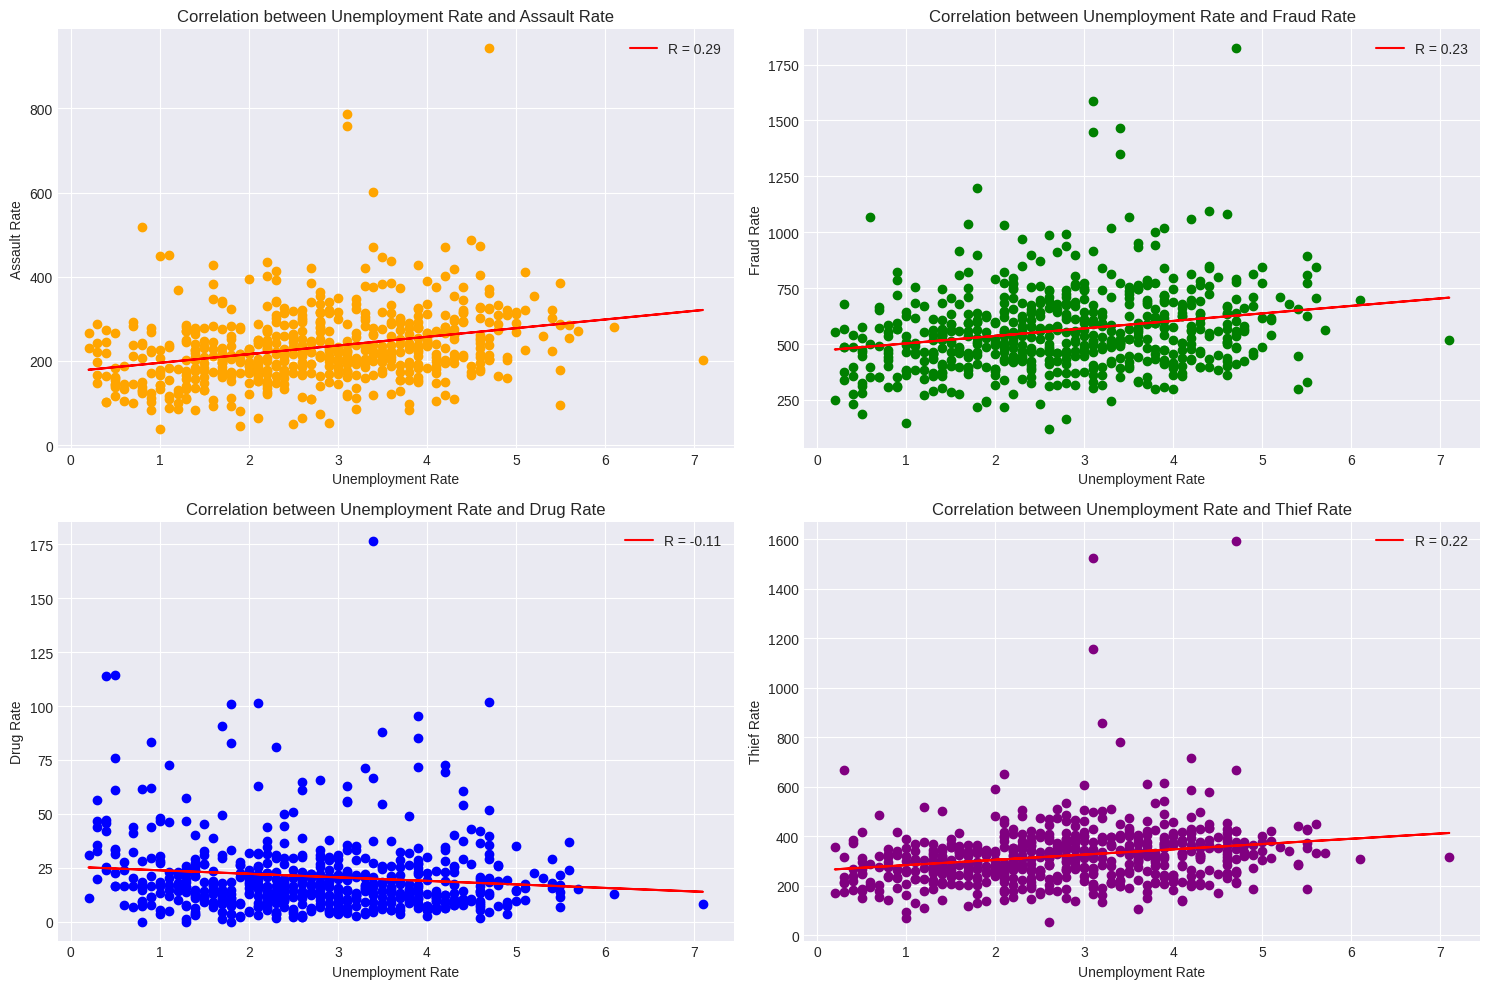

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = df_Crime_Aslt['Unemp']
y = df_Crime_Aslt['Crime_Aslt']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Unemployment Rate')
axes[0, 0].set_ylabel('Assault Rate')
axes[0, 0].set_title('Correlation between Unemployment Rate and Assault Rate')
axes[0, 0].legend()


x = df_Crime_Fraud['Unemp']
y = df_Crime_Fraud['Crime_Fraud']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Unemployment Rate')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].set_title('Correlation between Unemployment Rate and Fraud Rate')
axes[0, 1].legend()


x = df_Crime_Drug['Unemp']
y = df_Crime_Drug['Crime_Drug']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Unemployment Rate')
axes[1, 0].set_ylabel('Drug Rate')
axes[1, 0].set_title('Correlation between Unemployment Rate and Drug Rate')
axes[1, 0].legend()



x = df_Crime_Thief['Unemp']
y = df_Crime_Thief['Crime_Thief']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Unemployment Rate')
axes[1, 1].set_ylabel('Thief Rate')
axes[1, 1].set_title('Correlation between Unemployment Rate and Thief Rate')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 5. 고령화와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 (Log Scale 적용)##

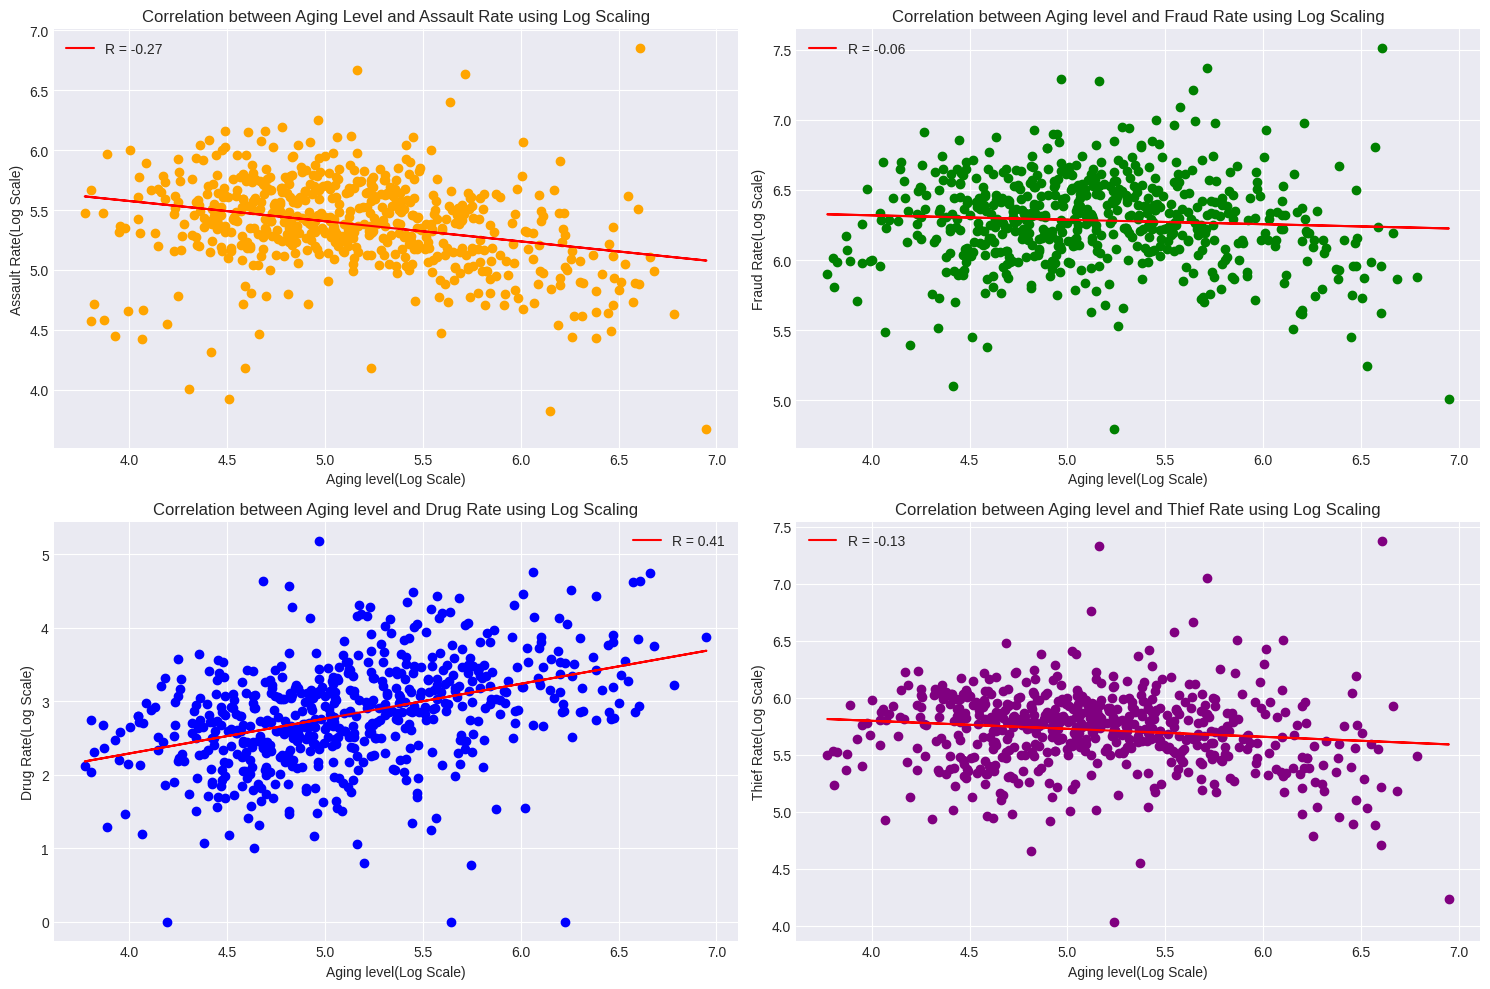

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = np.log1p(df_Crime_Aslt['Aging'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Aging level(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Aging Level and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Aging'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Aging level(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Aging level and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Drug['Aging'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Aging level(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Aging level and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Aging'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Aging level(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Aging level and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 6. 유흥 시설 수와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 (Log Scale 적용) ##

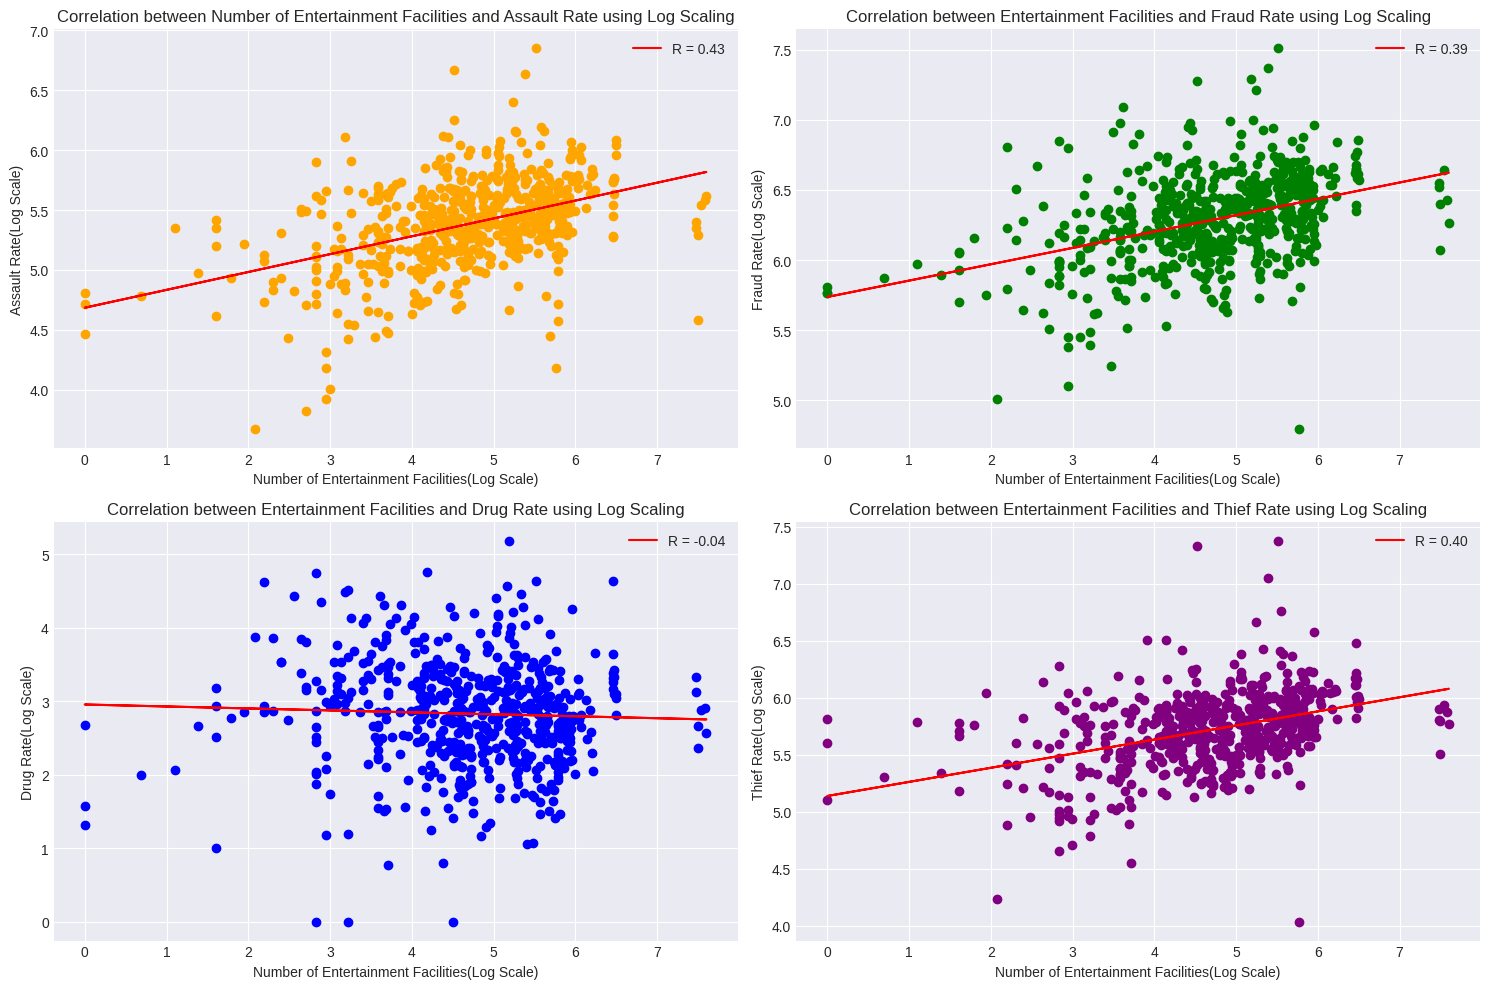

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = np.log1p(df_Crime_Aslt['Estab'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Number of Entertainment Facilities(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Number of Entertainment Facilities and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Estab'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Number of Entertainment Facilities(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Entertainment Facilities and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Fraud['Estab'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Number of Entertainment Facilities(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Entertainment Facilities and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Estab'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Number of Entertainment Facilities(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Entertainment Facilities and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 7. 다문화 가정 수와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 (Log Scale 적용) ##

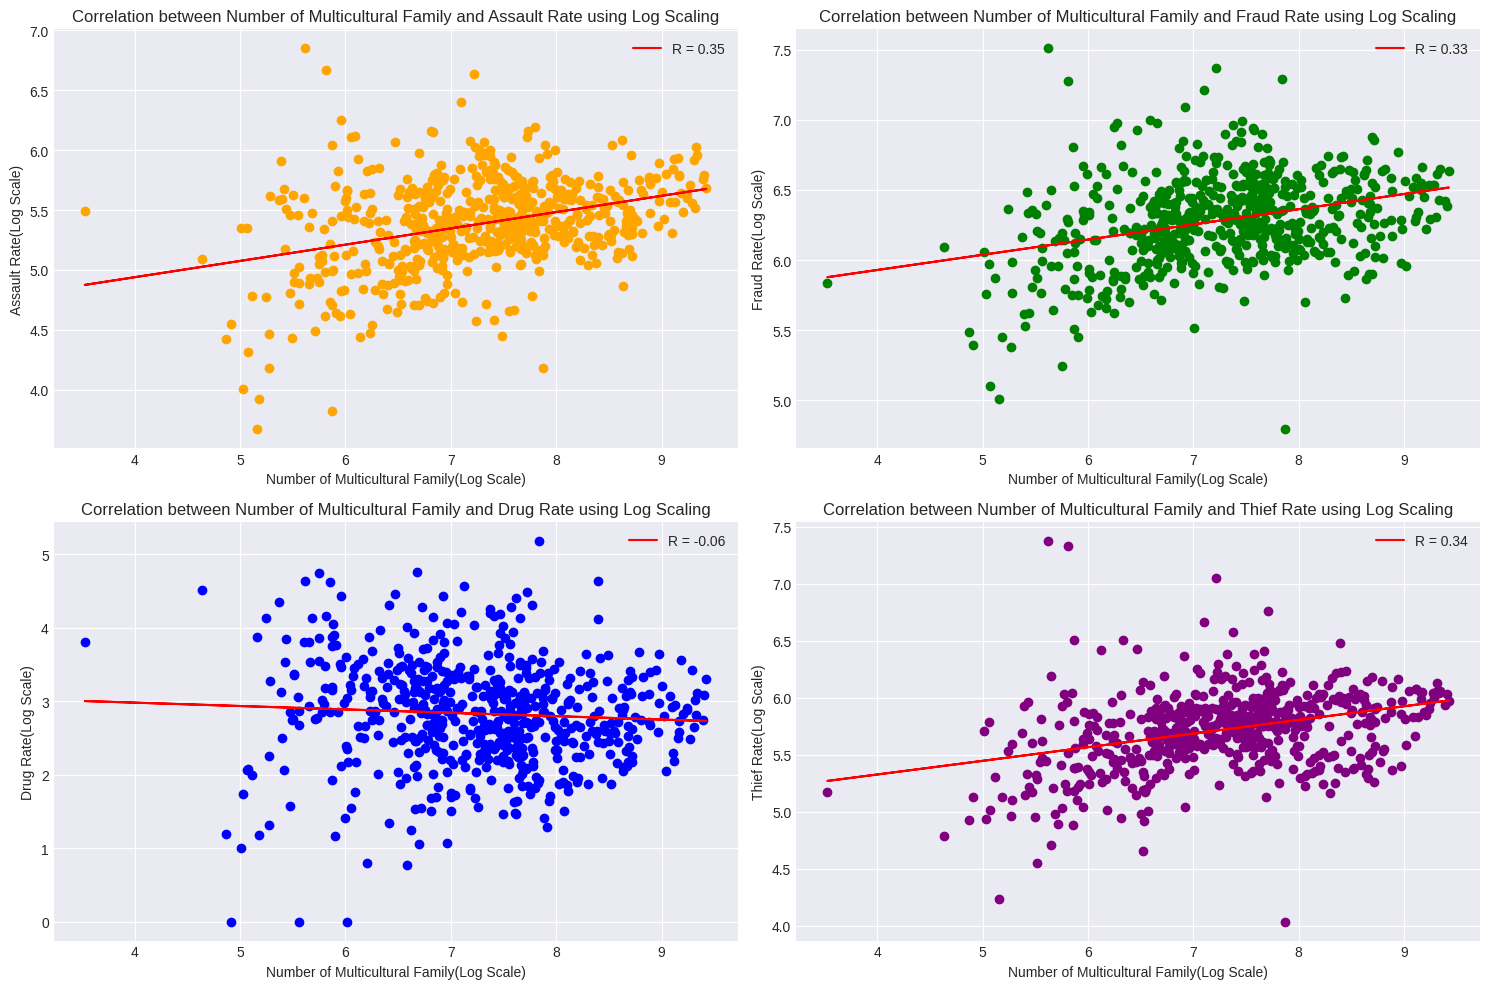

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = np.log1p(df_Crime_Aslt['Multi'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Number of Multicultural Family(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Number of Multicultural Family and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Multi'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Number of Multicultural Family(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Number of Multicultural Family and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Drug['Multi'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Number of Multicultural Family(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Number of Multicultural Family and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Multi'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Number of Multicultural Family(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Number of Multicultural Family and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 8. 경찰서 수와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계 ##

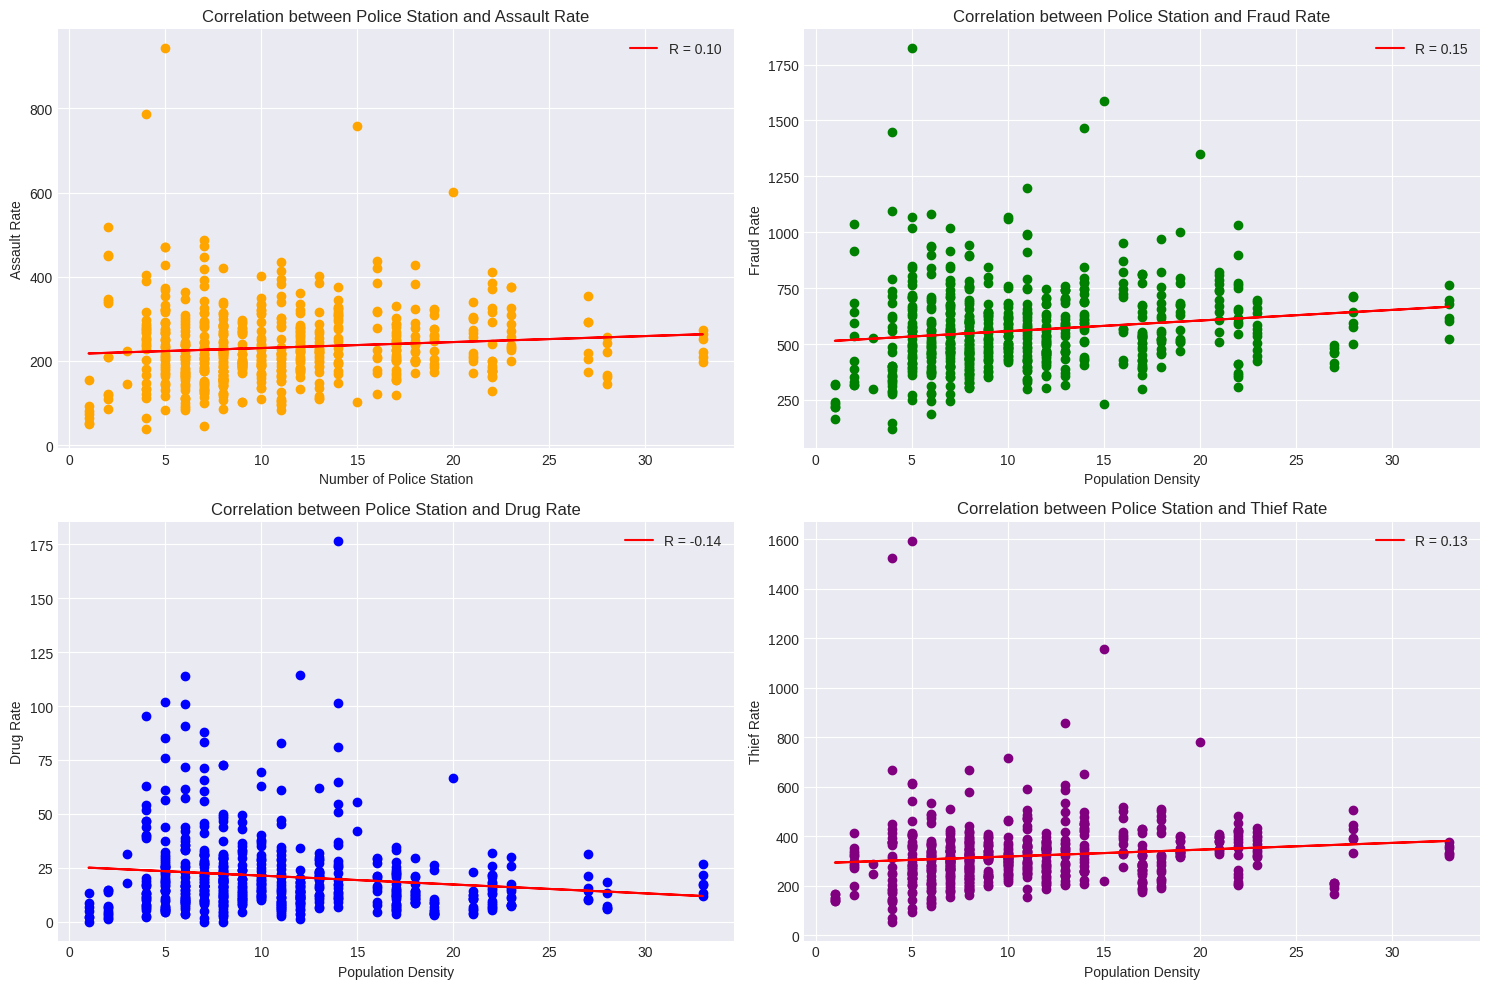

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = df_Crime_Aslt['StnNo']
y = df_Crime_Aslt['Crime_Aslt']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Number of Police Station')
axes[0, 0].set_ylabel('Assault Rate')
axes[0, 0].set_title('Correlation between Police Station and Assault Rate')
axes[0, 0].legend()


x = df_Crime_Fraud['StnNo']
y = df_Crime_Fraud['Crime_Fraud']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Population Density')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].set_title('Correlation between Police Station and Fraud Rate')
axes[0, 1].legend()


x = df_Crime_Drug['StnNo']
y = df_Crime_Drug['Crime_Drug']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Population Density')
axes[1, 0].set_ylabel('Drug Rate')
axes[1, 0].set_title('Correlation between Police Station and Drug Rate')
axes[1, 0].legend()



x = df_Crime_Thief['StnNo']
y = df_Crime_Thief['Crime_Thief']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Population Density')
axes[1, 1].set_ylabel('Thief Rate')
axes[1, 1].set_title('Correlation between Police Station and Thief Rate')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 9. 유동(통근) 인구수와 각 범죄율(폭행, 사기, 마약, 절도) 간 상관관계(Log Scale 적용) ##

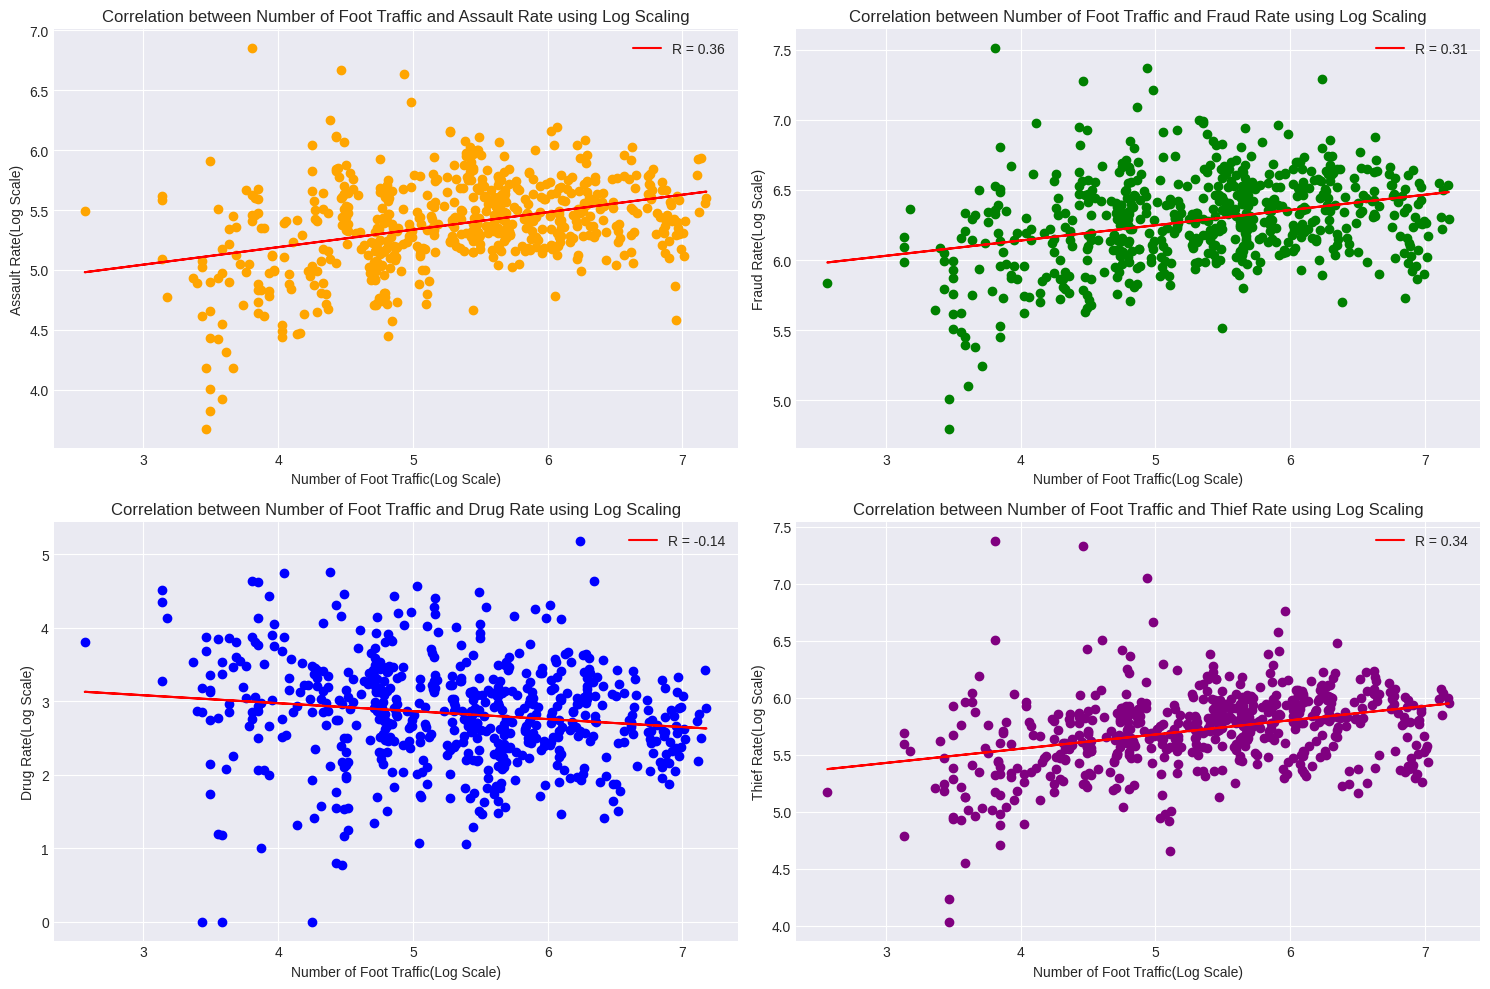

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


x = np.log1p(df_Crime_Aslt['Float'])
y = np.log1p(df_Crime_Aslt['Crime_Aslt'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 0].scatter(x, y, c='orange')
axes[0, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 0].set_xlabel('Number of Foot Traffic(Log Scale)')
axes[0, 0].set_ylabel('Assault Rate(Log Scale)')
axes[0, 0].set_title('Correlation between Number of Foot Traffic and Assault Rate using Log Scaling')
axes[0, 0].legend()


x = np.log1p(df_Crime_Fraud['Float'])
y = np.log1p(df_Crime_Fraud['Crime_Fraud'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[0, 1].scatter(x, y, c='green')
axes[0, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[0, 1].set_xlabel('Number of Foot Traffic(Log Scale)')
axes[0, 1].set_ylabel('Fraud Rate(Log Scale)')
axes[0, 1].set_title('Correlation between Number of Foot Traffic and Fraud Rate using Log Scaling')
axes[0, 1].legend()


x = np.log1p(df_Crime_Drug['Float'])
y = np.log1p(df_Crime_Drug['Crime_Drug'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 0].scatter(x, y, c='blue')
axes[1, 0].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 0].set_xlabel('Number of Foot Traffic(Log Scale)')
axes[1, 0].set_ylabel('Drug Rate(Log Scale)')
axes[1, 0].set_title('Correlation between Number of Foot Traffic and Drug Rate using Log Scaling')
axes[1, 0].legend()


x = np.log1p(df_Crime_Thief['Float'])
y = np.log1p(df_Crime_Thief['Crime_Thief'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
r_score = r_value
axes[1, 1].scatter(x, y, c='purple')
axes[1, 1].plot(x, line, color='red', label=f'R = {r_score:.2f}')
axes[1, 1].set_xlabel('Number of Foot Traffic(Log Scale)')
axes[1, 1].set_ylabel('Thief Rate(Log Scale)')
axes[1, 1].set_title('Correlation between Number of Foot Traffic and Thief Rate using Log Scaling')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Pair Plot ##

(1) 폭행 범죄율

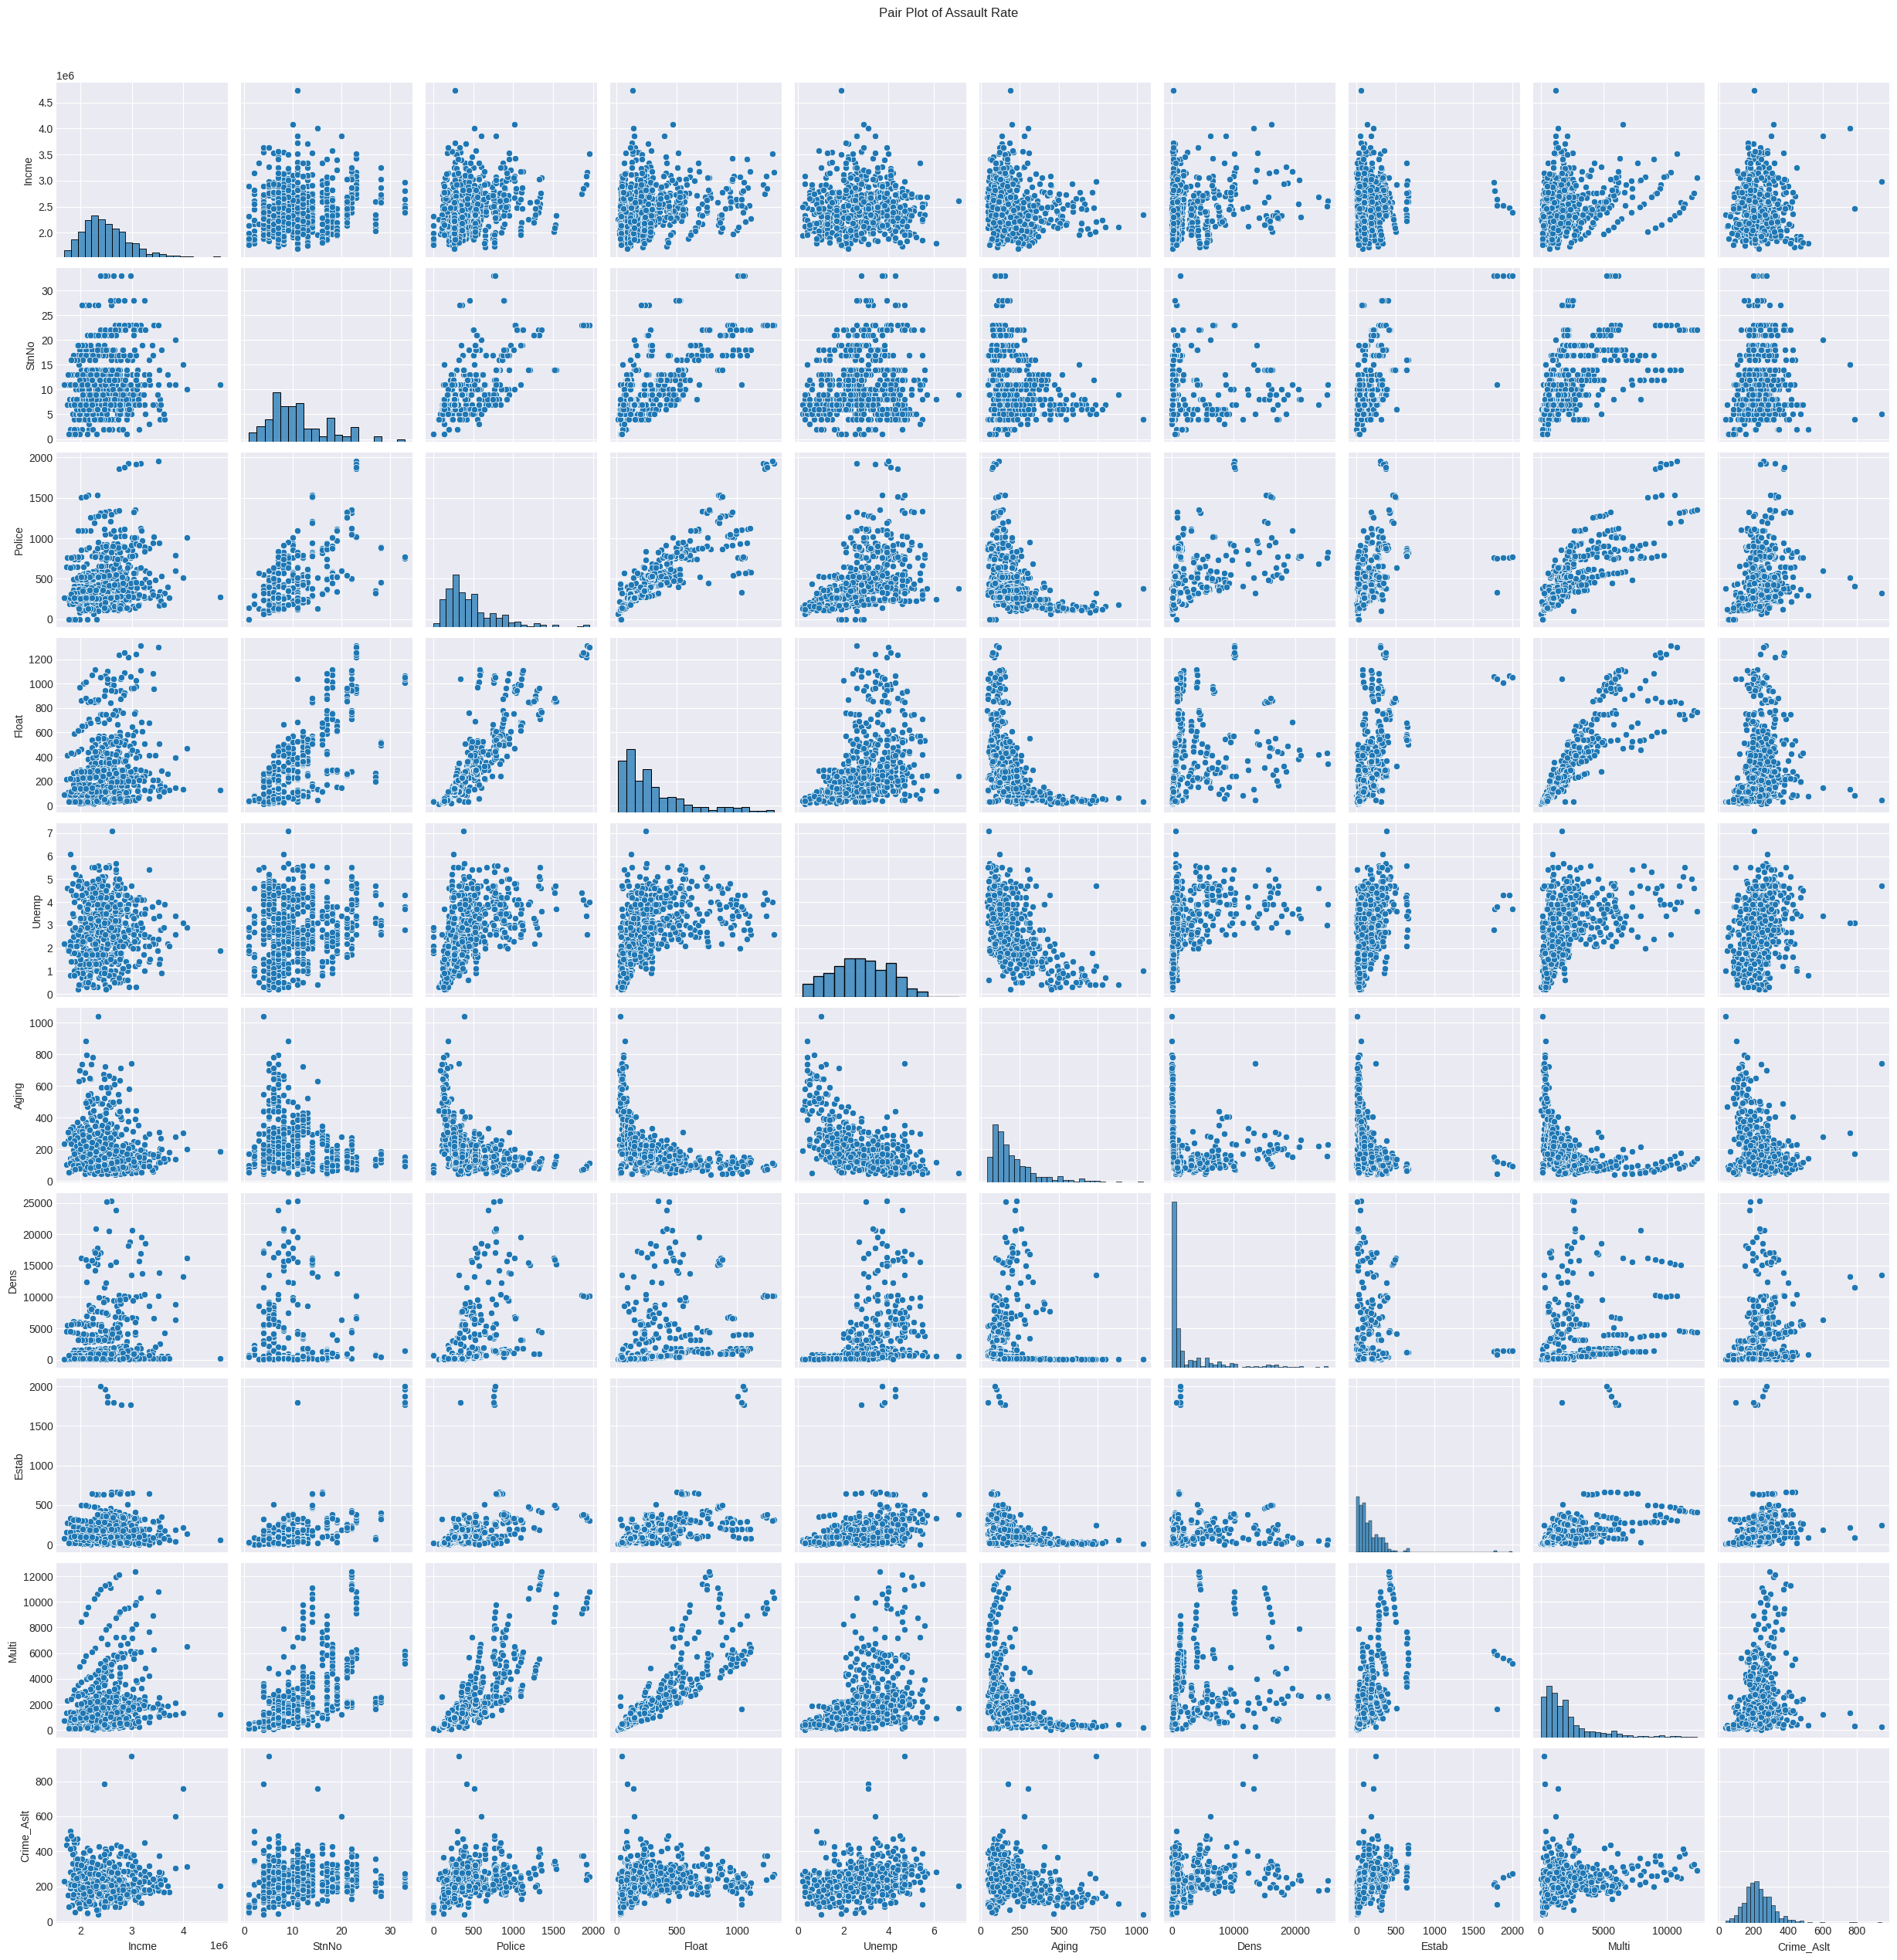

In [ ]:
sns.pairplot(df_Crime_Aslt)
plt.suptitle('Pair Plot of Assault Rate', y=1.02)
plt.show()

(2) 사기 범죄율

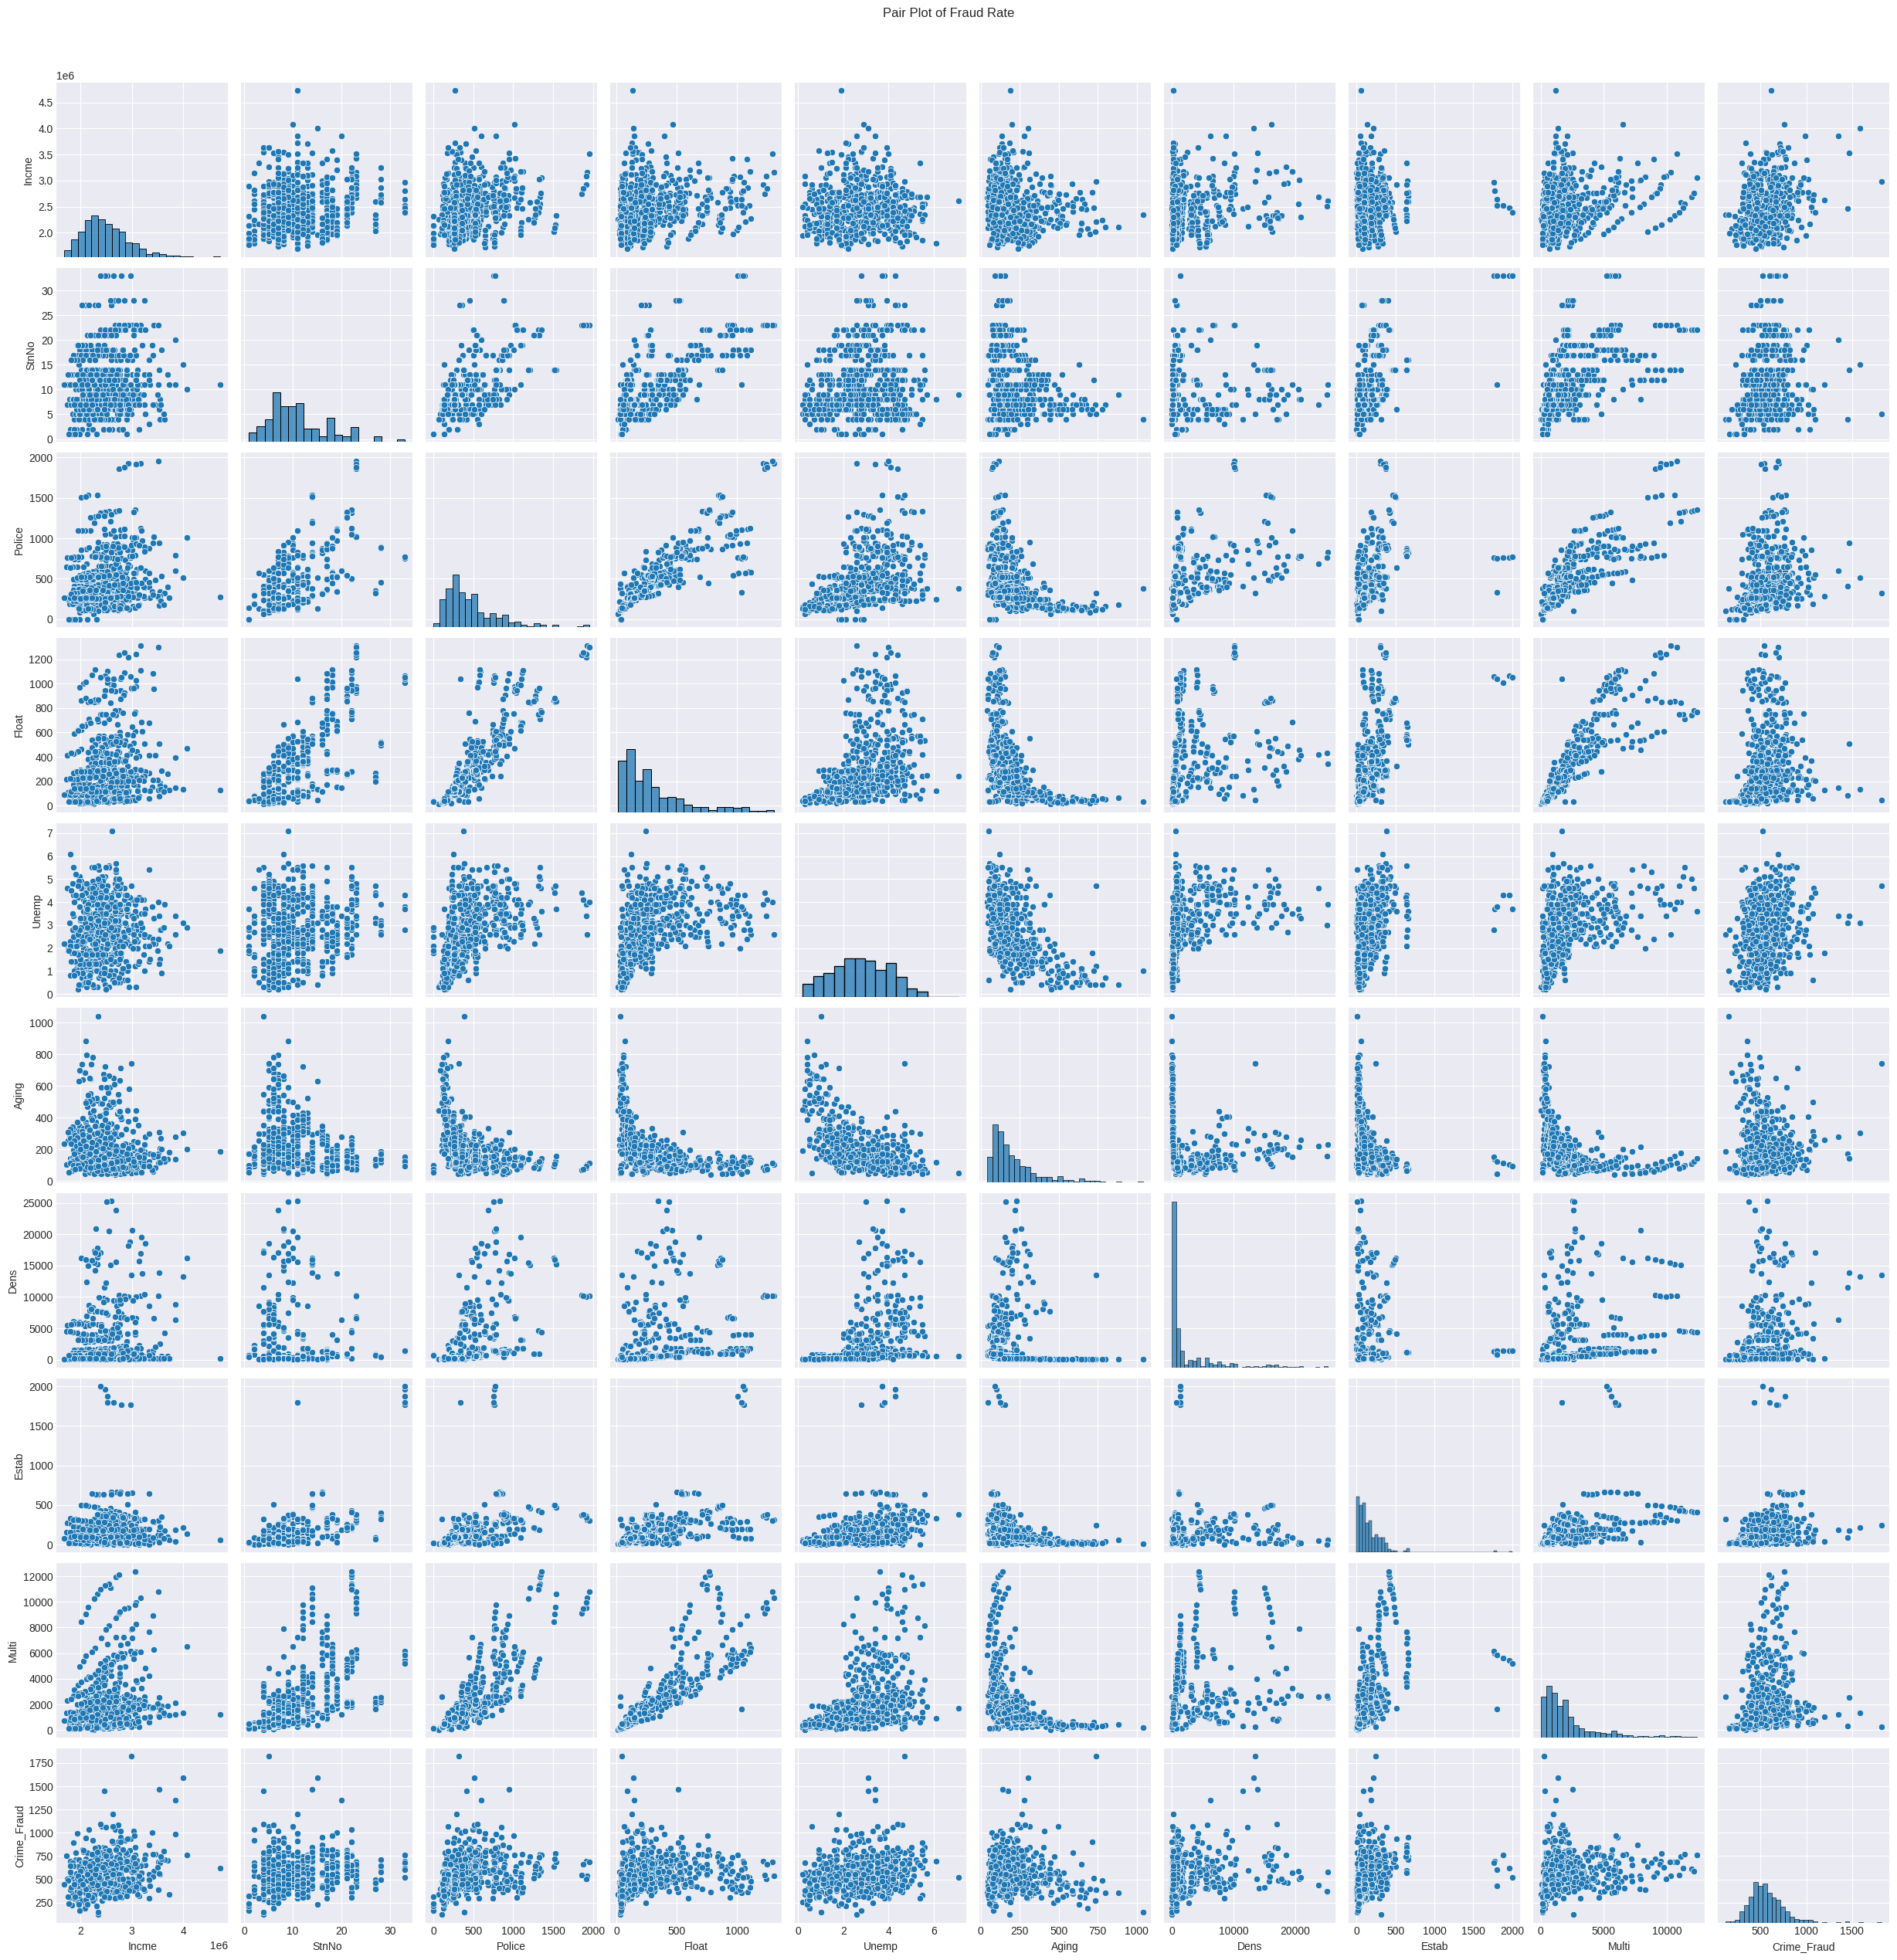

In [ ]:
sns.pairplot(df_Crime_Fraud)
plt.suptitle('Pair Plot of Fraud Rate', y=1.02)
plt.show()

(3) 마약 범죄율

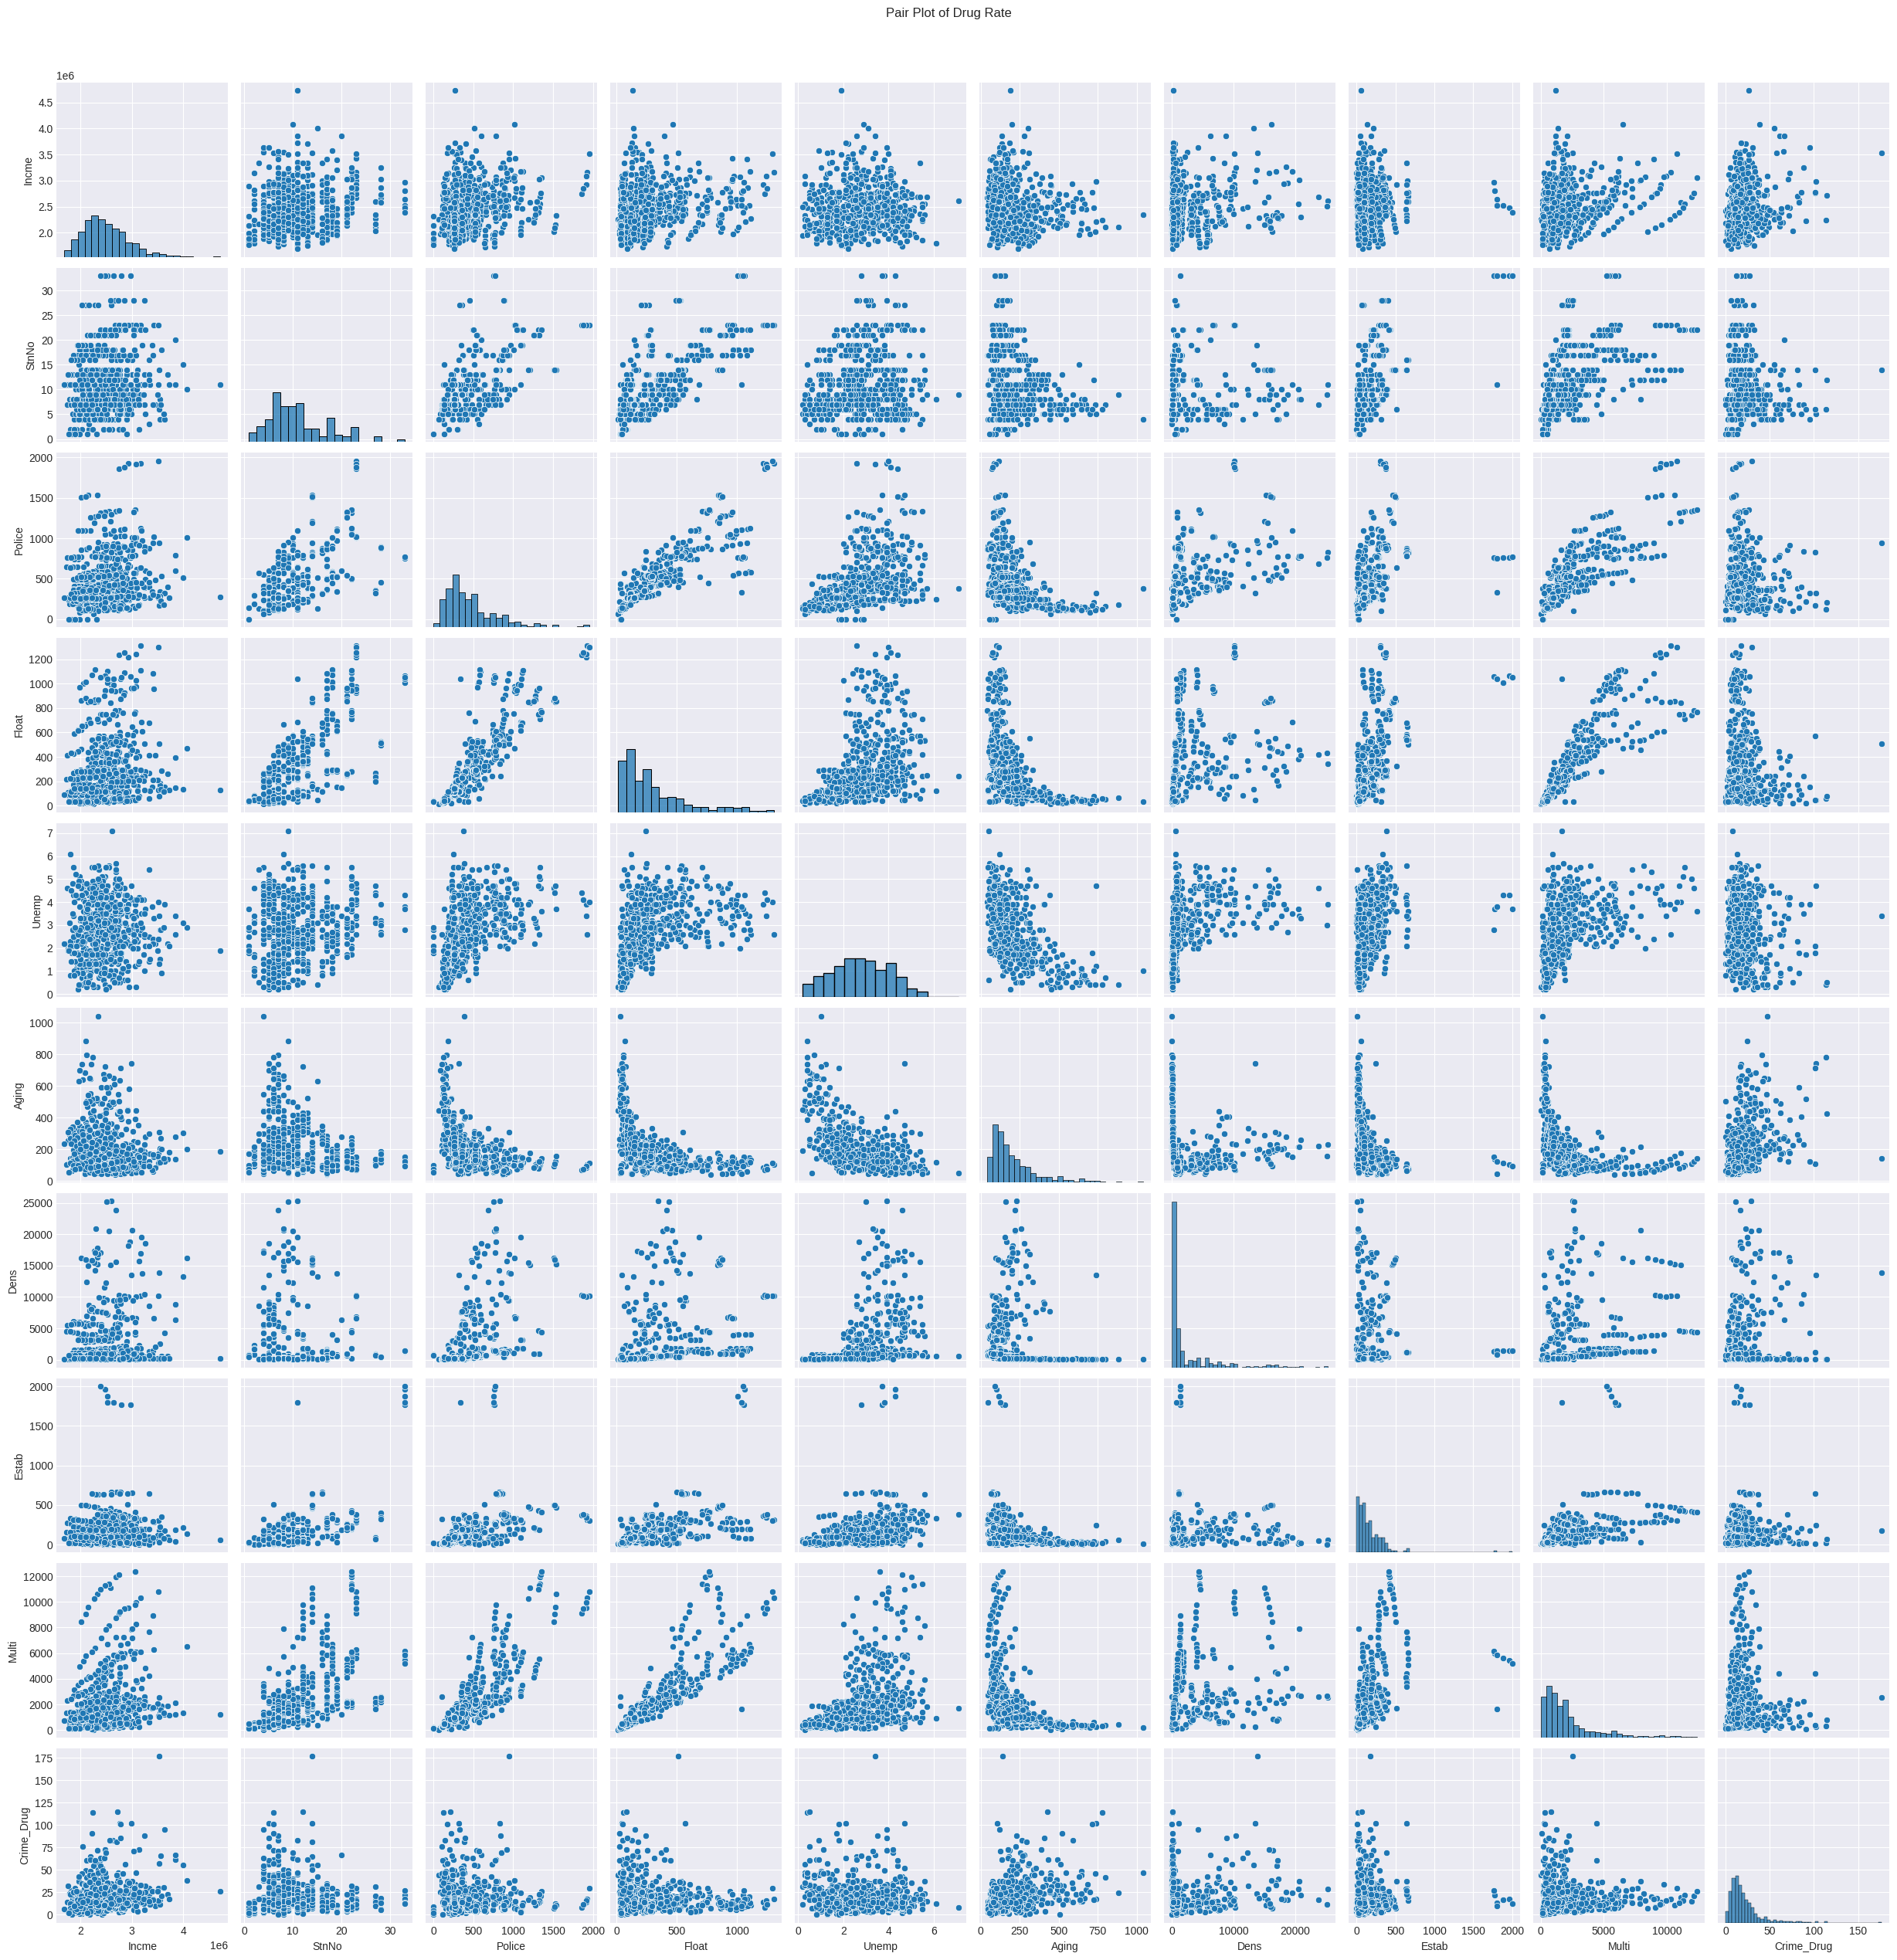

In [ ]:
sns.pairplot(df_Crime_Drug)
plt.suptitle('Pair Plot of Drug Rate', y=1.02)
plt.show()

(4) 절도 범죄율

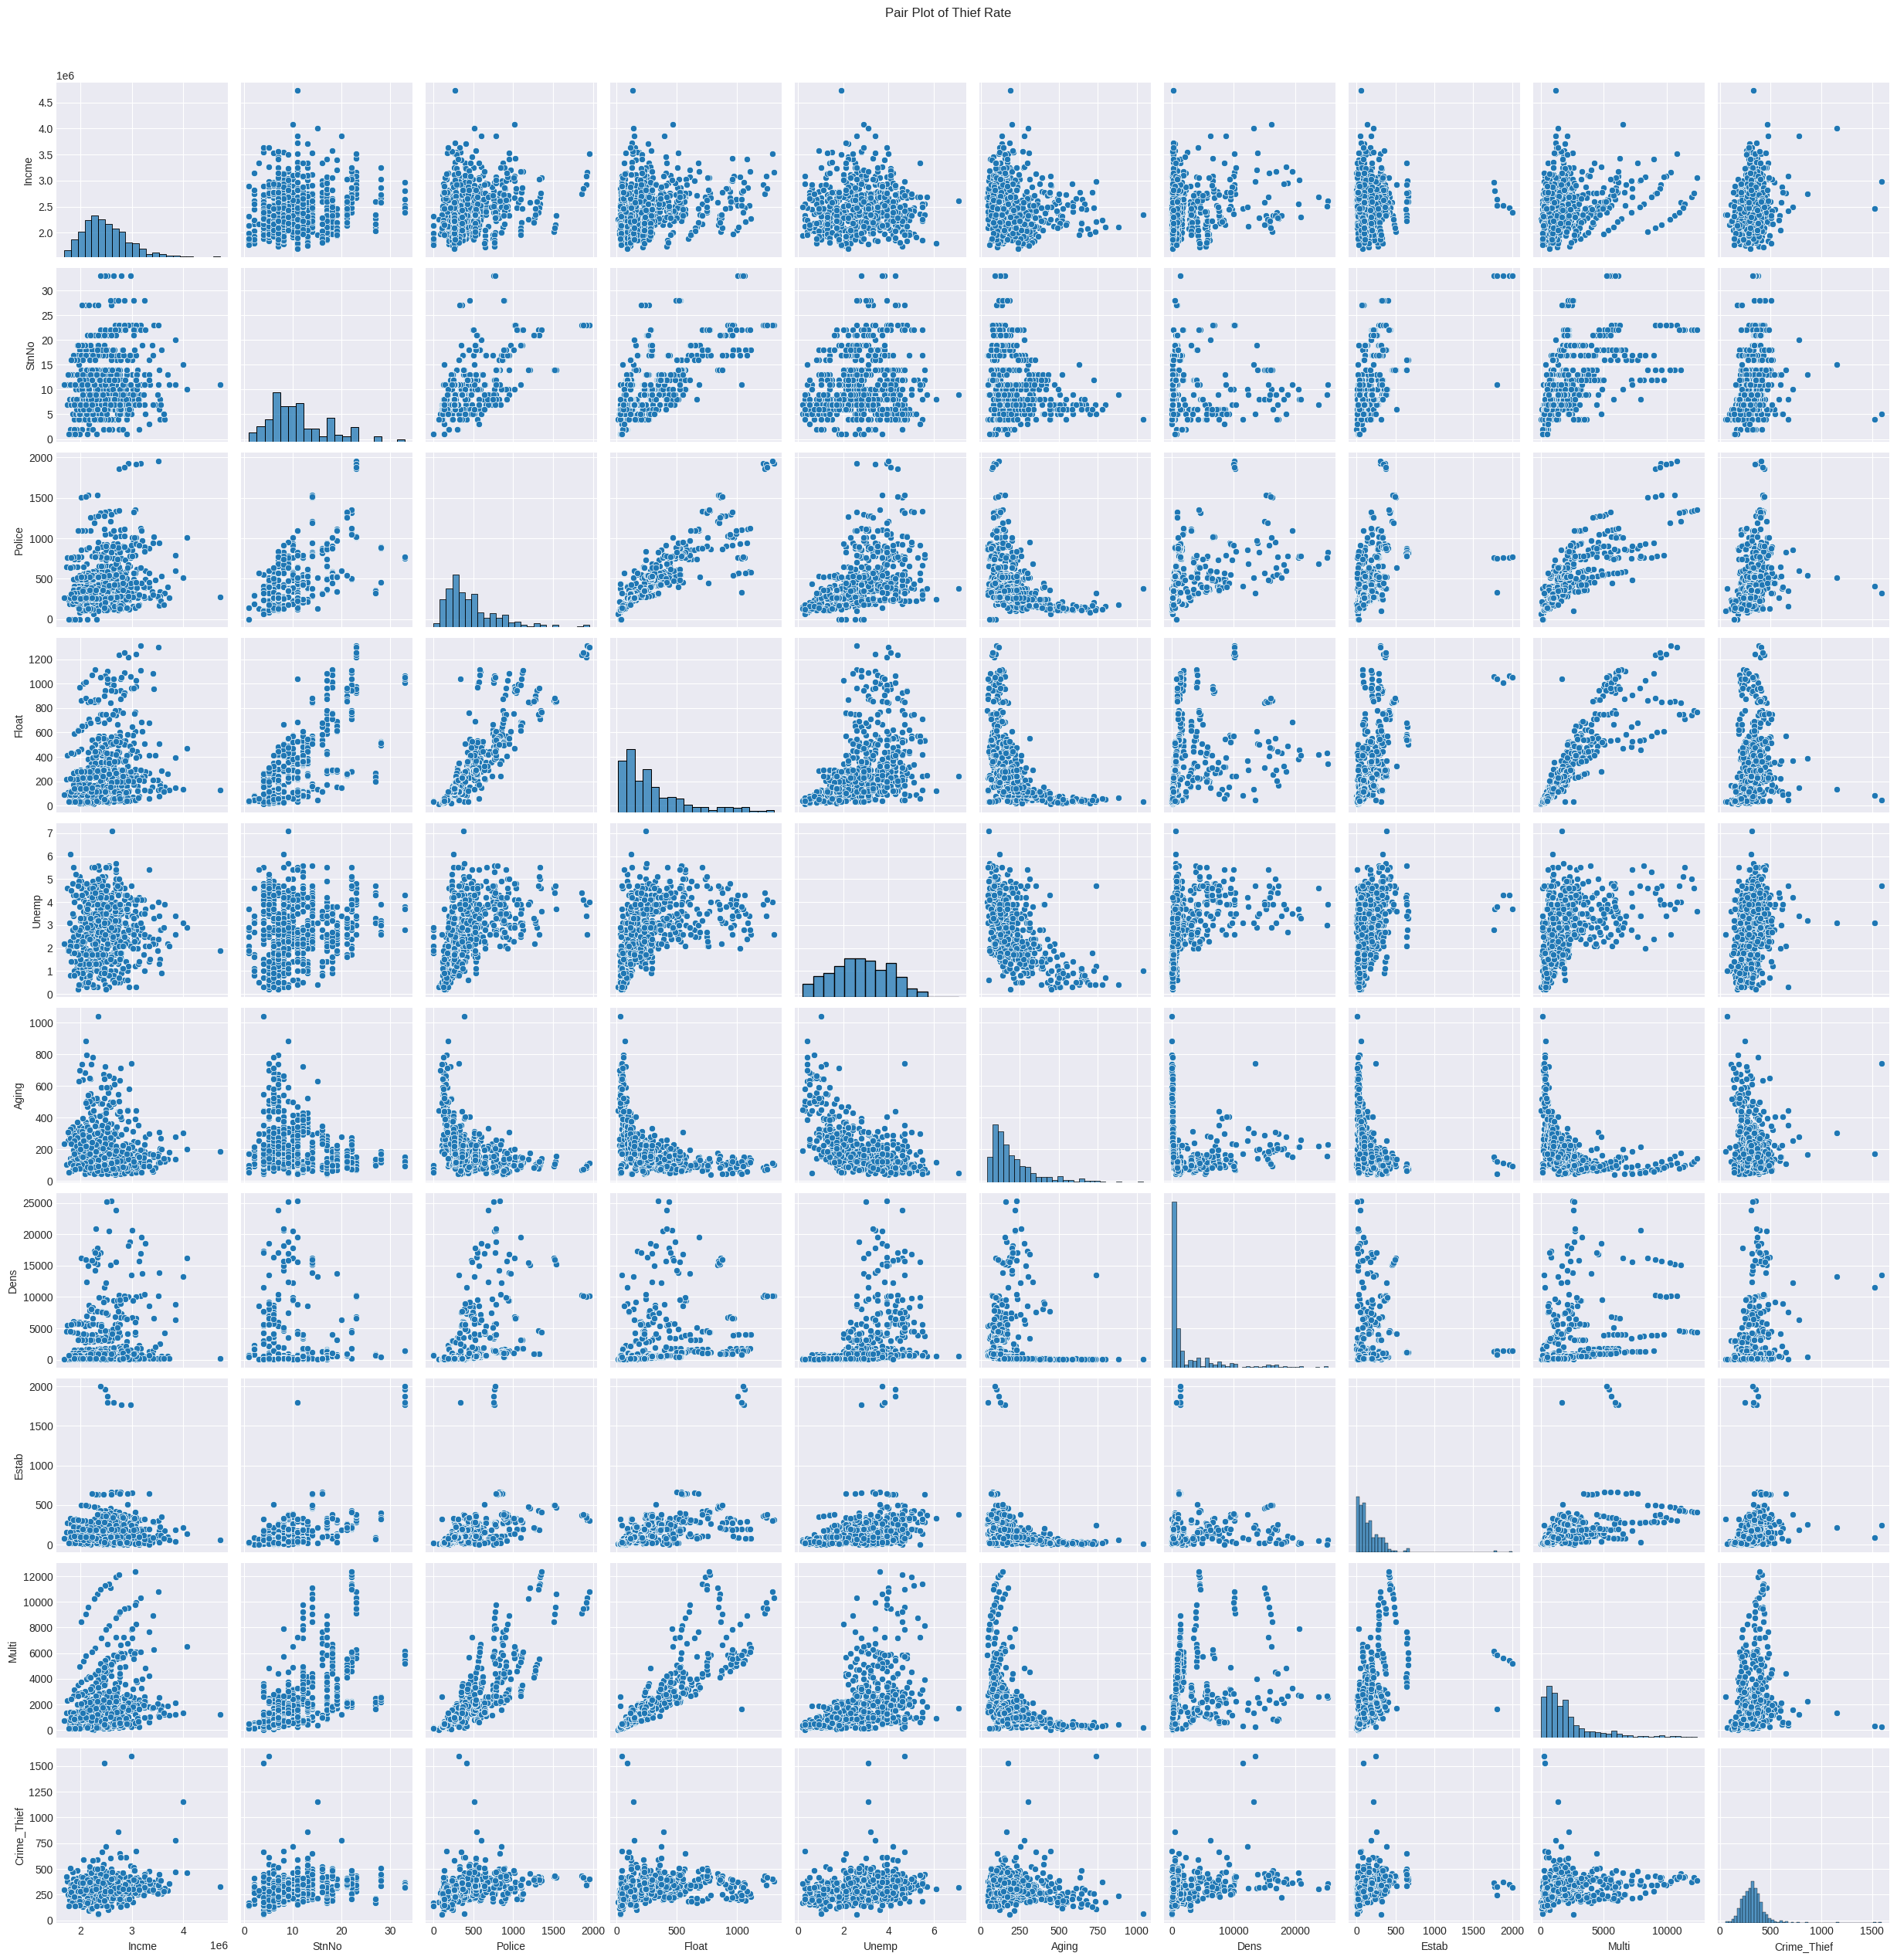

In [ ]:
sns.pairplot(df_Crime_Thief)
plt.suptitle('Pair Plot of Thief Rate', y=1.02)
plt.show()